# COMP 484 - Practical Assignment 1

#### Ramraj Chimouriya
#### CE IV/I

## Chapter 1 - Getting started with Python Machine Learning

---

## 1. Learning Numpy

In [1]:
import numpy as np
np.version.full_version

'1.22.4'

In [2]:
# Initialize a numpy array
a = np.array([1,4,3,2,5,6,8, 7])

In [3]:
a

array([1, 4, 3, 2, 5, 6, 8, 7])

In [4]:
# No. of array dimension
a.ndim

1

In [5]:
# Array dimension
a.shape

(8,)

In [6]:
# Changing array size. Reshape, but dos not change values
b = a.reshape(4,2)

In [7]:
b

array([[1, 4],
       [3, 2],
       [5, 6],
       [8, 7]])

In [8]:
b.ndim

2

In [9]:
b.shape

(4, 2)

In [10]:
# Changing some value in b changes in a as well.
b[1][0] = 45

In [11]:
b

array([[ 1,  4],
       [45,  2],
       [ 5,  6],
       [ 8,  7]])

In [12]:
a

array([ 1,  4, 45,  2,  5,  6,  8,  7])

In [13]:
# So, it is appropriate to copy whenever you don't need to modify true data
c = a.reshape(4,2).copy()

In [14]:
c

array([[ 1,  4],
       [45,  2],
       [ 5,  6],
       [ 8,  7]])

In [15]:
c[0][1] = 88

In [16]:
c

array([[ 1, 88],
       [45,  2],
       [ 5,  6],
       [ 8,  7]])

In [17]:
a

array([ 1,  4, 45,  2,  5,  6,  8,  7])

In [18]:
# Multiplying a numpy array will result in the array of same size with values being multiplied.
d = np.array([1,2,3,4,5])

In [19]:
# Multiply each element of d by 2
d*2

array([ 2,  4,  6,  8, 10])

In [20]:
# Square each element of array d
d**2

array([ 1,  4,  9, 16, 25])

### Indexing in Numpy

In [21]:
a

array([ 1,  4, 45,  2,  5,  6,  8,  7])

In [22]:
# Numpy allows to use array themselves as indices.
a[np.array([2,4,6])]


array([45,  5,  8])

In [23]:
# Conditional operations
a > 5

array([False, False,  True, False, False,  True,  True,  True])

In [24]:
# 
a[a>5]

array([45,  6,  8,  7])

In [25]:
a[a>5] = 5
a

array([1, 4, 5, 2, 5, 5, 5, 5])

In [26]:
a.clip(3,4)

array([3, 4, 4, 3, 4, 4, 4, 4])

### Handling nonexistent values

Handling invalid datas using `numpy.NAN`.

In [27]:
c = np.array([1, 2, np.NAN, 3, 4])

In [28]:
c

array([ 1.,  2., nan,  3.,  4.])

In [29]:
np.isnan(c)

array([False, False,  True, False, False])

In [30]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [31]:
np.mean(c[~np.isnan(c)])

2.5

---

## 2. Learning SciPy

In [32]:
import scipy

In [33]:
scipy.version.full_version

'1.8.1'

In [34]:
scipy.dot is np.dot

False

In [35]:
# Manual of scipy
scipy?

Type:        module
String form: <module 'scipy' from '/home/ramraj/.local/lib/python3.10/site-packages/scipy/__init__.py'>
File:        ~/.local/lib/python3.10/site-packages/scipy/__init__.py
Docstring:  
SciPy: A scientific computing package for Python

Documentation is available in the docstrings and
online at https://docs.scipy.org.

Contents
--------
SciPy imports all the functions from the NumPy namespace, and in
addition provides:

Subpackages
-----------
Using any of these subpackages requires an explicit import. For example,
``import scipy.cluster``.

::

 cluster                      --- Vector Quantization / Kmeans
 fft                          --- Discrete Fourier transforms
 fftpack                      --- Legacy discrete Fourier transforms
 integrate                    --- Integration routines
 interpolate                  --- Interpolation Tools
 io                           --- Data input and output
 linalg                       --- Linear algebra routines
 linalg.blas

---

## 3. First application of machine learning

We have an wep start-up, MLaaS, which sells the service of providing machine learning algorithms via HTTP.

What we need to answer is the question, when will we hit the limit of our current infrastructue, which we estimated to have a capacity of about 100000 requests per hour?
Or, how long will our server be able to handle the incoming web traffic?

### Generating dummy web traffic data

In [36]:
import os
from scipy.stats import gamma
import matplotlib.pyplot as plt
%matplotlib inline

# get data directory and charts directory
DATA_DIR = os.path.join(os.getcwd(), "data")
CHART_DIR = os.path.join(os.getcwd(), "charts")

if not os.path.exists(DATA_DIR): os.mkdir(DATA_DIR)
if not os.path.exists(CHART_DIR): os.mkdir(CHART_DIR)

np.random.seed(3)

def gen_web_traffic_data():
    x = np.arange(1, 31*24)
    y = np.array(200*(np.sin(2*np.pi*x/(7*24))), dtype=np.float32)
    y += gamma.rvs(15, loc=0, scale=100, size=len(x))
    y += 2* np.exp(x/100)   # 30 days with 24 hours a day
    y = np.ma.array(y, mask=[y<0])  # mask all values less than 0

    y[[3,5,1,7,100,204, 163, 211, 45]] = np.nan   # introducing some invalid data

    return x, y


def plot_web_traffic(x, y, models=None, mx=None, ymax=None, fig_idx=None):
    plt.figure(figsize=(12,6), dpi=300) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(20)], 
               ['week %i' %w for w in range(20)])
    plt.legend(["web_traffic"], loc="upper left")
    
    if models:
        colors = ['g', 'k', 'y', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']

        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["web_traffic"]+["d=%i" %m.order for m in models], loc="upper left")
        
    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)

    plt.grid()
    plt.ylim(ymin=0)
    
    if fig_idx is not None:
        plt.savefig(os.path.join(CHART_DIR, f"Chart{fig_idx}.png"))
    

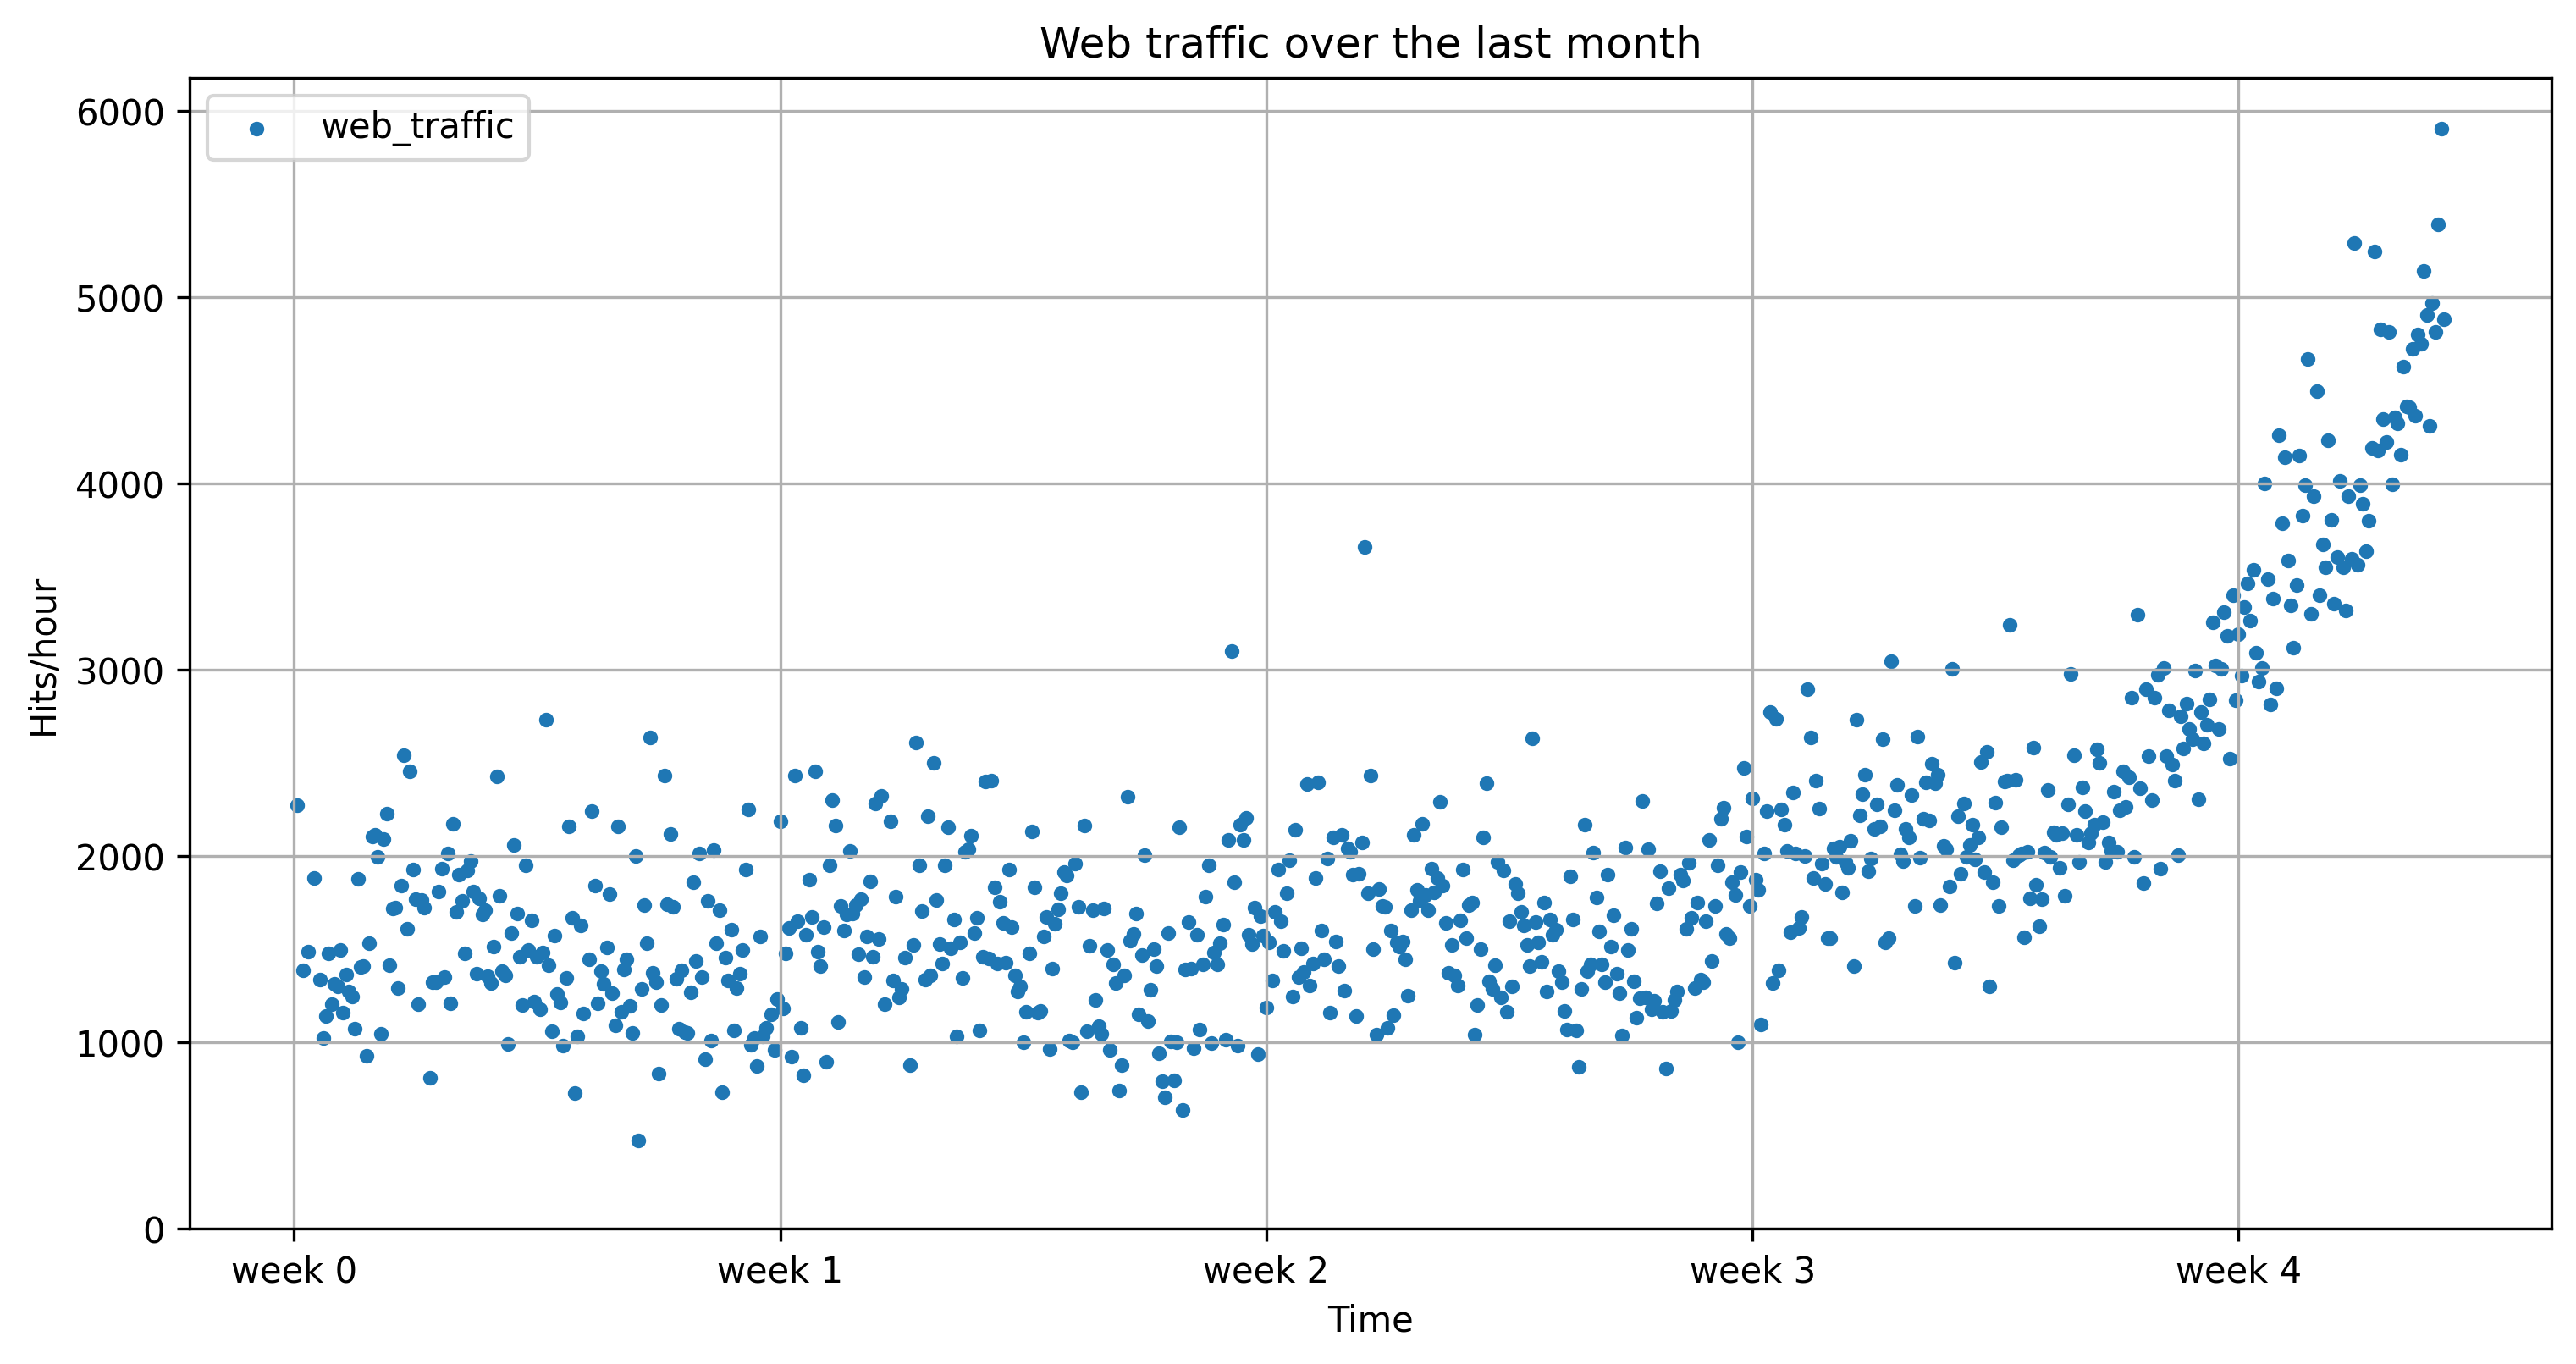

In [37]:
x, y = gen_web_traffic_data()
np.savetxt(os.path.join(DATA_DIR, "web_traffic.tsv"),
            list(zip(x,y)), delimiter="\t", fmt="%f")

plot_web_traffic(x,y, fig_idx="0001")

### Reding in the data

In [38]:
data = np.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), delimiter="\t")


In [39]:
print(data[:15])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00            nan]
 [3.00000000e+00 1.38743311e+03]
 [4.00000000e+00            nan]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00            nan]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00            nan]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]
 [1.10000000e+01 1.14024109e+03]
 [1.20000000e+01 1.47834180e+03]
 [1.30000000e+01 1.20421838e+03]
 [1.40000000e+01 1.31250635e+03]
 [1.50000000e+01 1.30021887e+03]]


In [40]:
data.shape

(743, 2)

### Preprocessing and cleaning the data

In [41]:
# Split data in two parts hours and web_traffics

hours = data[:,0]
web_traffic = data[:,1]

In [42]:
# Check the invalid values in web_traffic.

np.sum(np.isnan(web_traffic))

9

In [43]:
# Removing those 9 datas from both hours and web_traffic list
hours = hours[~np.isnan(web_traffic)]
web_traffic = web_traffic[~np.isnan(web_traffic)]

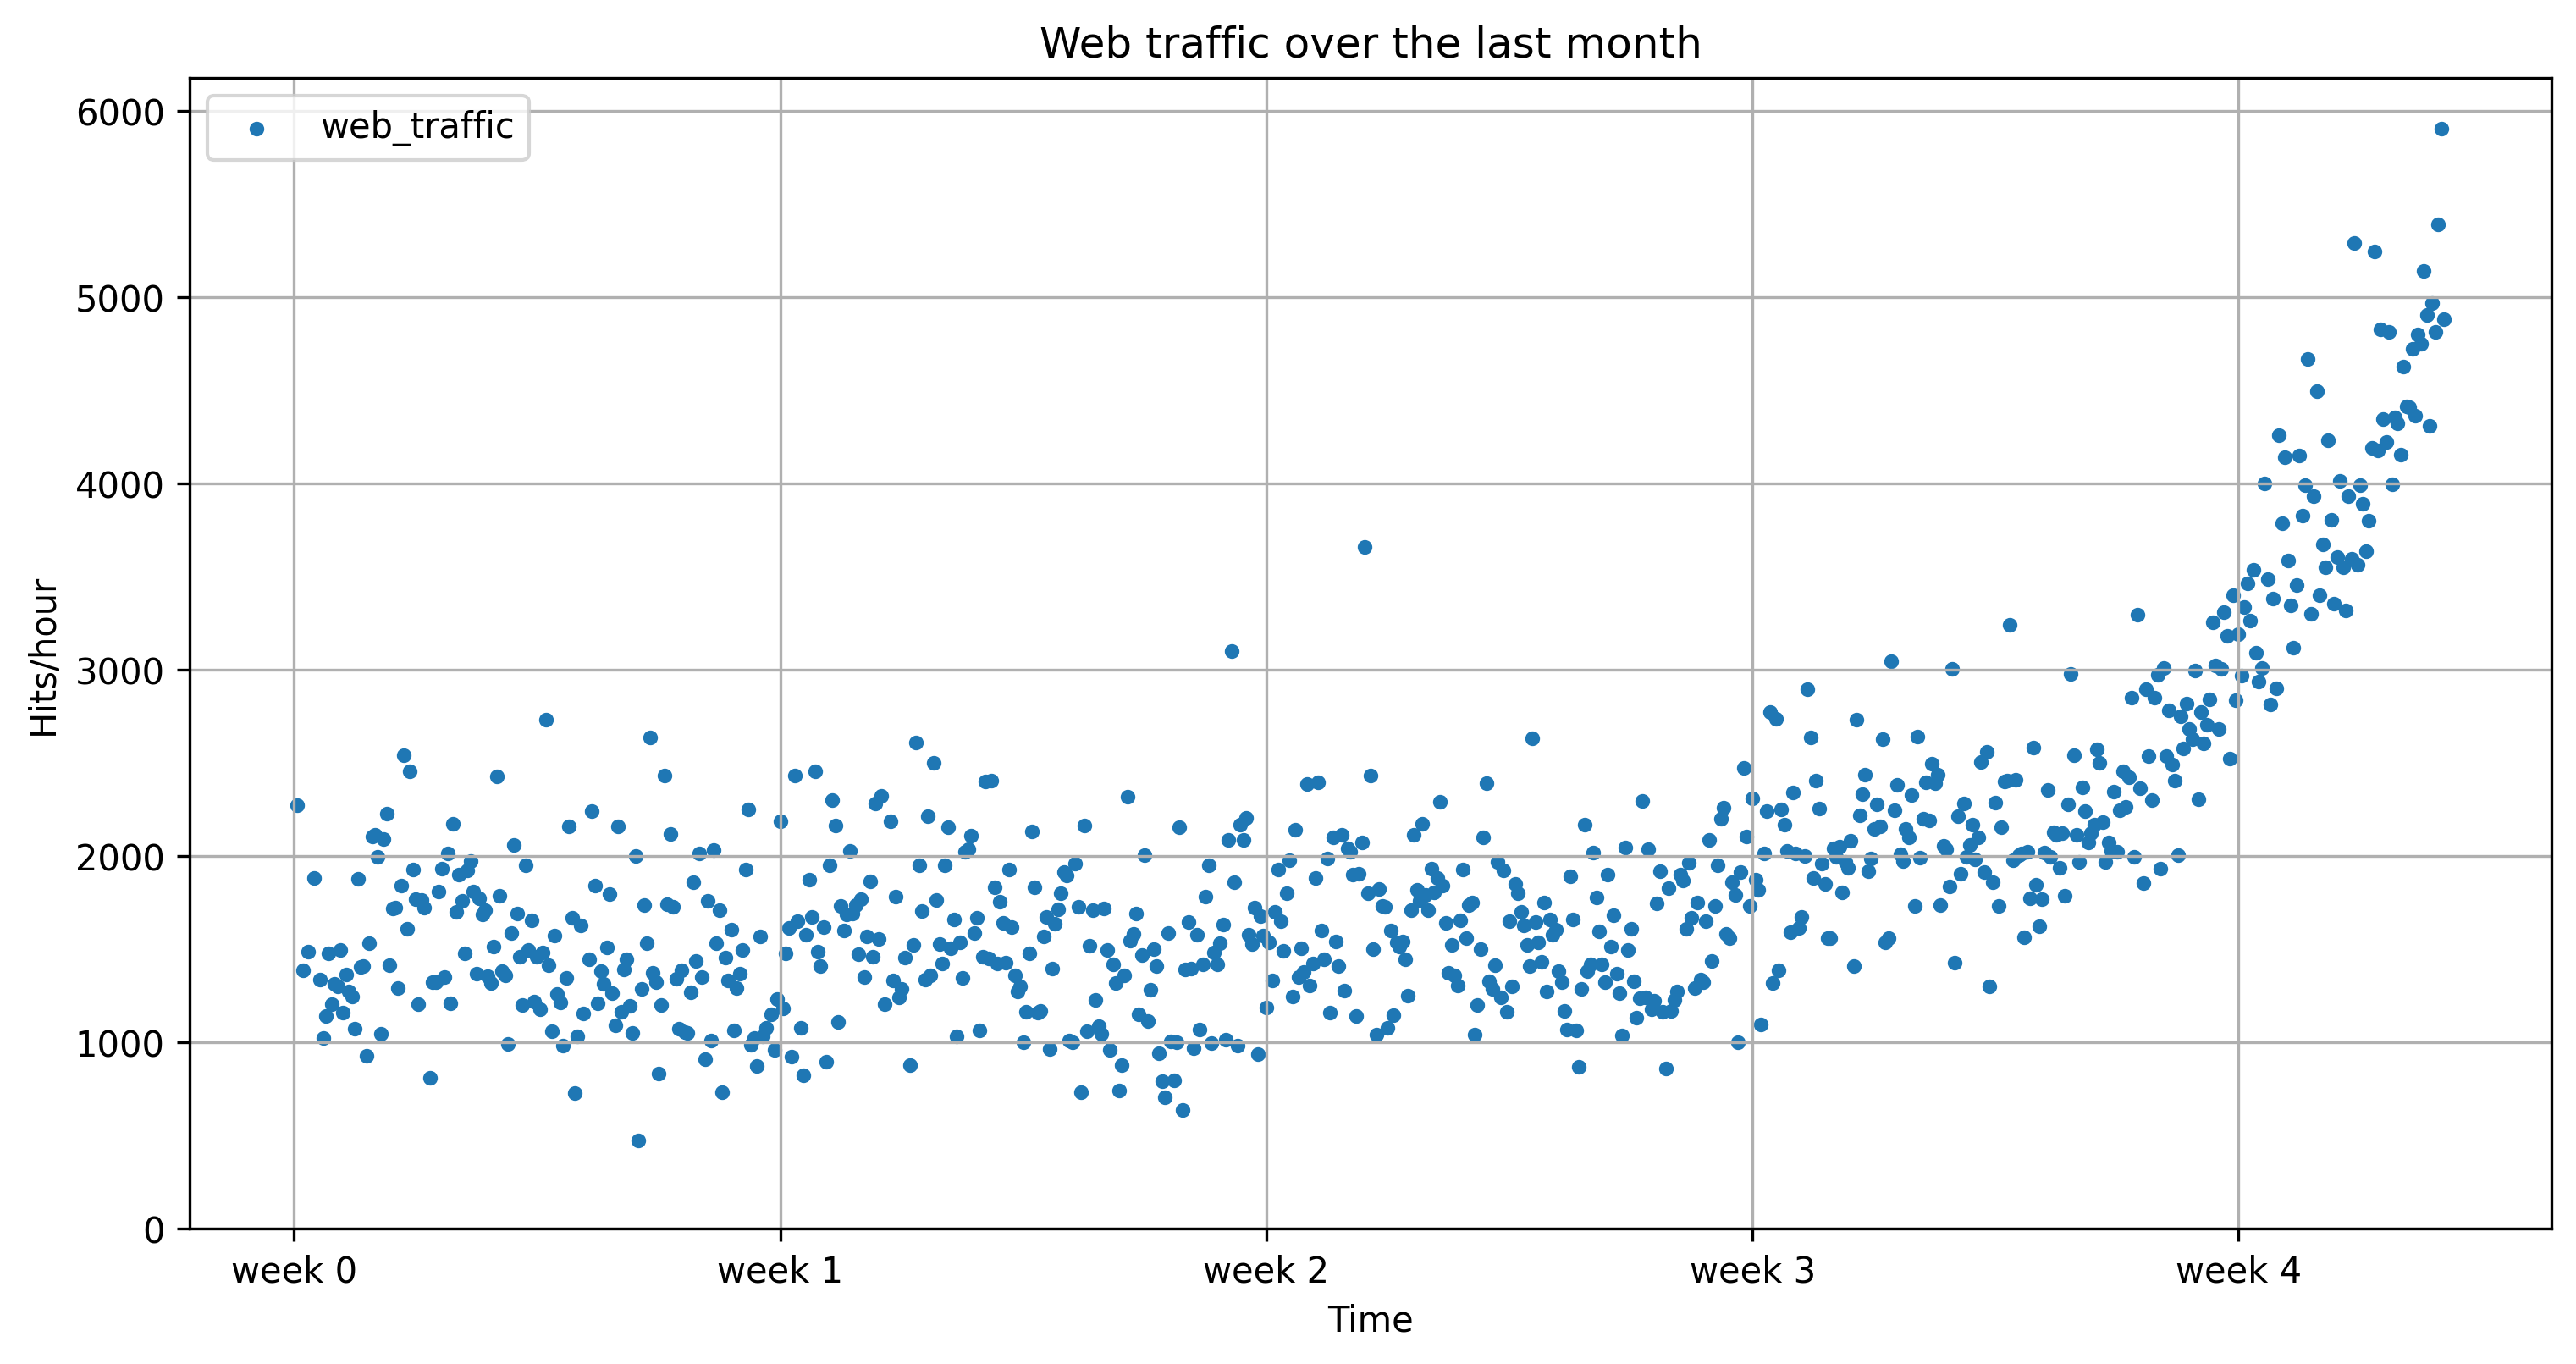

In [44]:
plot_web_traffic(hours, web_traffic,fig_idx="0002")

### Before building our first model

There are always some error in real data. So, the error could be calculated as the squared distance of the model's prediction to real data.

For a learned model function, f, the error is calculated as

In [45]:
def error(f, x, y):
    return np.sum((f(x) - y)**2)

### Starting with a simple straight line

Assuming that the underlying model is a straight line.

In [46]:
fp1 = np.polyfit(hours, web_traffic, 1)

f"Model parameters:{fp1}"

'Model parameters:[  2.60966982 984.05523288]'

In [47]:
f1 = np.poly1d(fp1)
error(f1, hours, web_traffic)

316474009.72075063

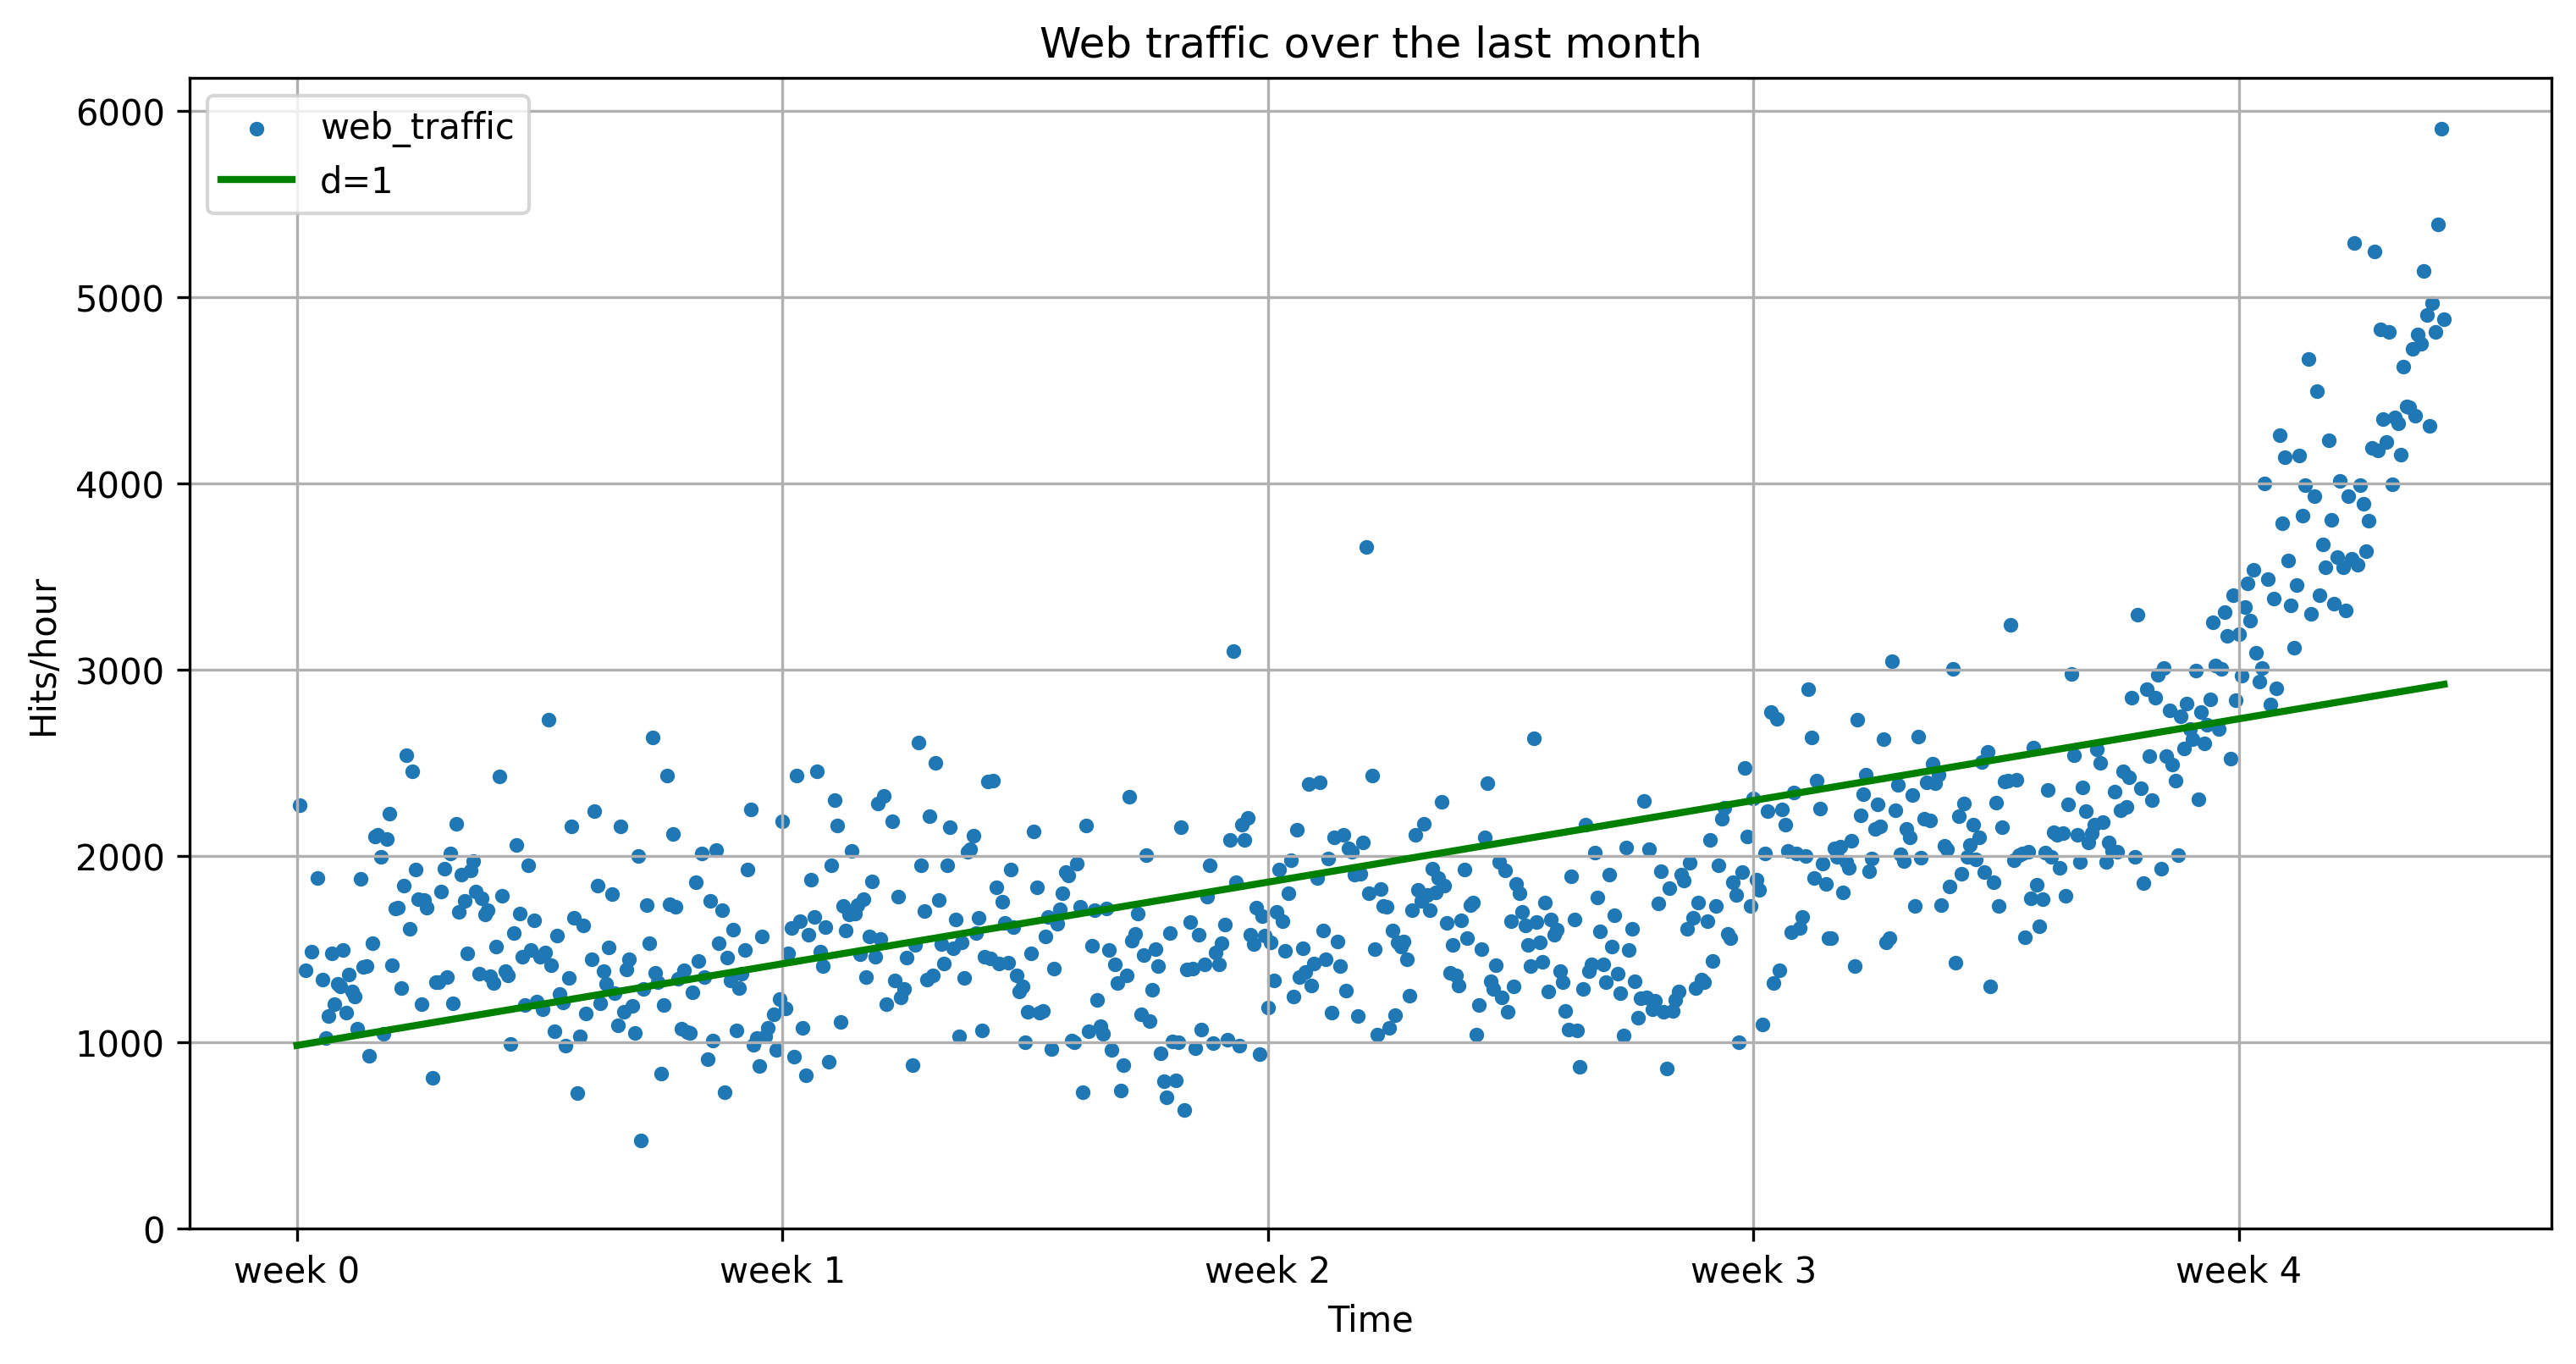

In [48]:
plot_web_traffic(hours, web_traffic, models=[f1], fig_idx="0003")

### Toward more complex models

In [49]:
f2p = np.polyfit(hours, web_traffic, 2)
f2 = np.poly1d(f2p)
error(f2, hours, web_traffic)

180631860.7634651

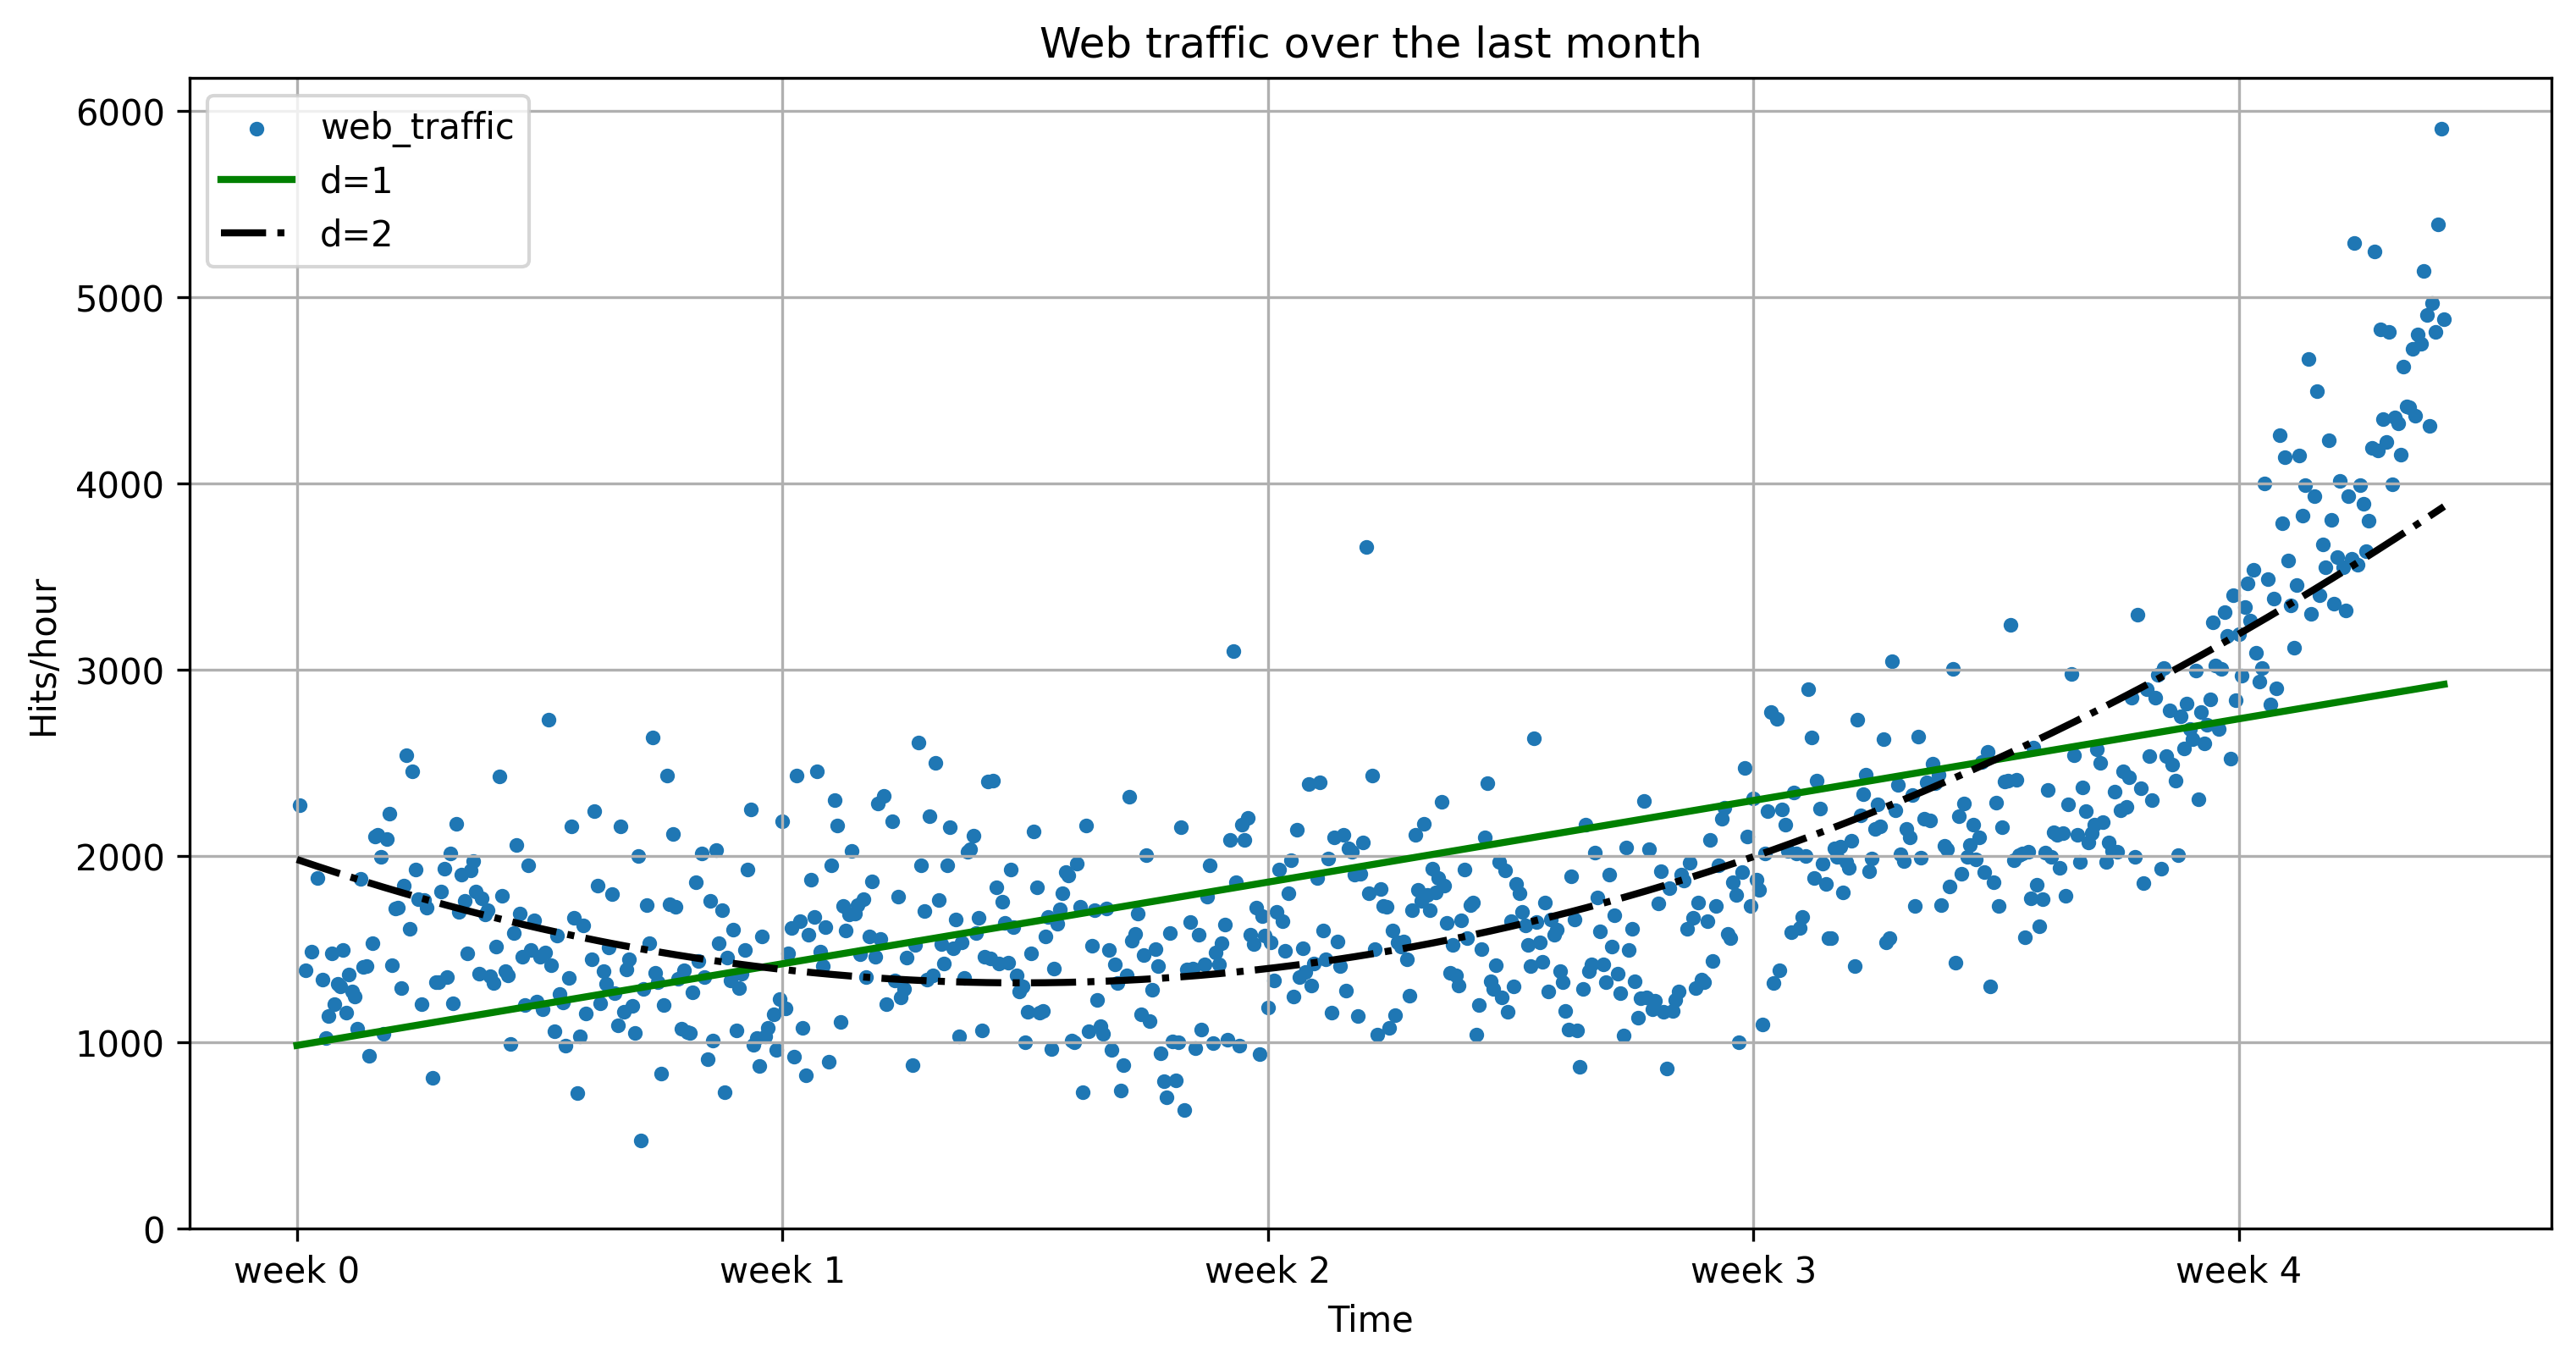

In [50]:
plot_web_traffic(hours, web_traffic, models=[f1, f2], fig_idx="0004")

In [51]:
f3p = np.polyfit(hours, web_traffic, 3)
f3 = np.poly1d(f3p)
f10p = np.polyfit(hours, web_traffic, 10)
f10 = np.poly1d(f10p)
f100p = np.polyfit(hours, web_traffic, 100)
f100 = np.poly1d(f100p)

/usr/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


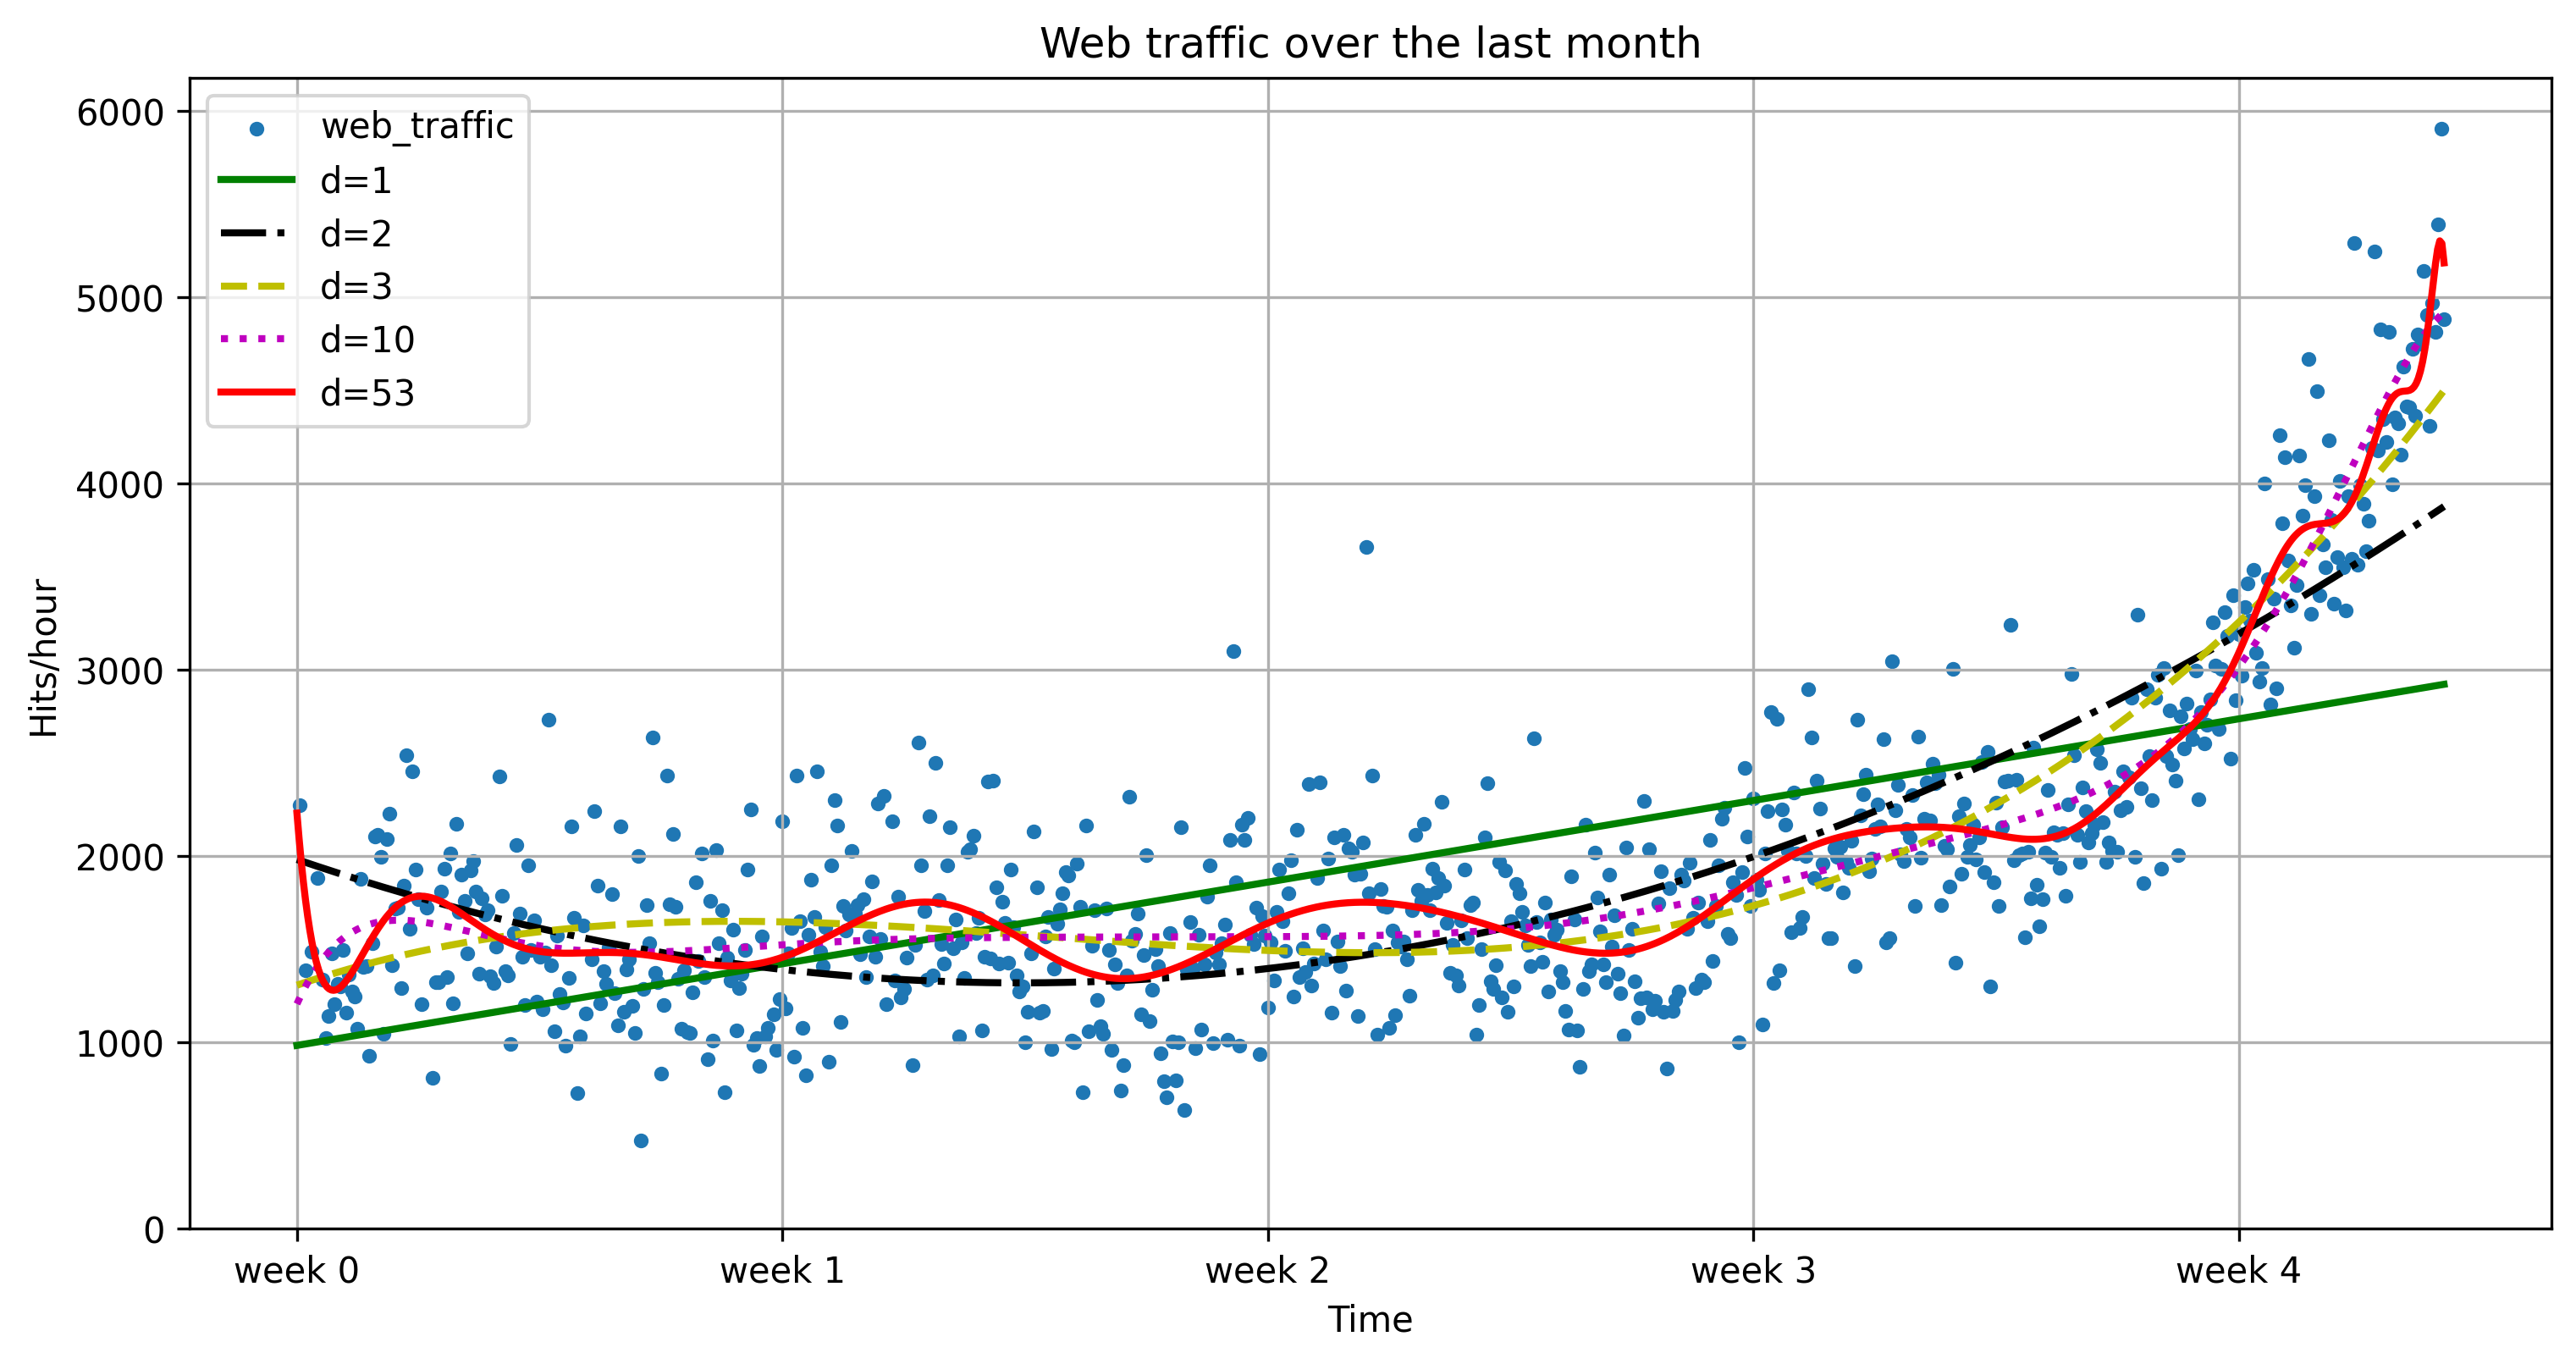

In [52]:
plot_web_traffic(hours, web_traffic, models=[f1, f2, f3, f10, f100], fig_idx="0004")

In [53]:
print("Errors for the complete data set for different orders")
for f in [f1, f2, f3, f10, f100]:
    print(f"d={f.order}; error={error(f, hours, web_traffic)}")

Errors for the complete data set for different orders
d=1; error=316474009.72075063
d=2; error=180631860.7634651
d=3; error=138920994.74041188
d=10; error=122315498.94334424
d=53; error=109963008.18919584


Looking at the polynomials of
degree 10 and 53, we see wildly oscillating behavior. It seems that the models are fitted too much
to the data. So much so that the graph is now capturing not only the underlying process, but also
the noise. This is called overfitting.

### Stepping back to go forward - another look at our data

It seems that there is an inflection point between weeks 3 and 4. Let's separate the data and train two lines using week 3.5 as a separation point:

In [54]:
inflection = int(3.5*7*24)

# Data before inflection point
xa = hours[:inflection]
ya = web_traffic[:inflection]

# Data after inflection point
xb = hours[inflection:]
yb = web_traffic[inflection:]

f1ap = np.polyfit(xa, ya, 1)
f1bp = np.polyfit(xb, yb, 1)

f1a = np.poly1d(f1ap)
f1b = np.poly1d(f1bp)

In [55]:
# Errors
f1a_e = error(f1a, xa, ya)
f1b_e = error(f1b, xb, yb)
print(f"Error is {f1a_e + f1b_e}")

Error is 132728865.3025155


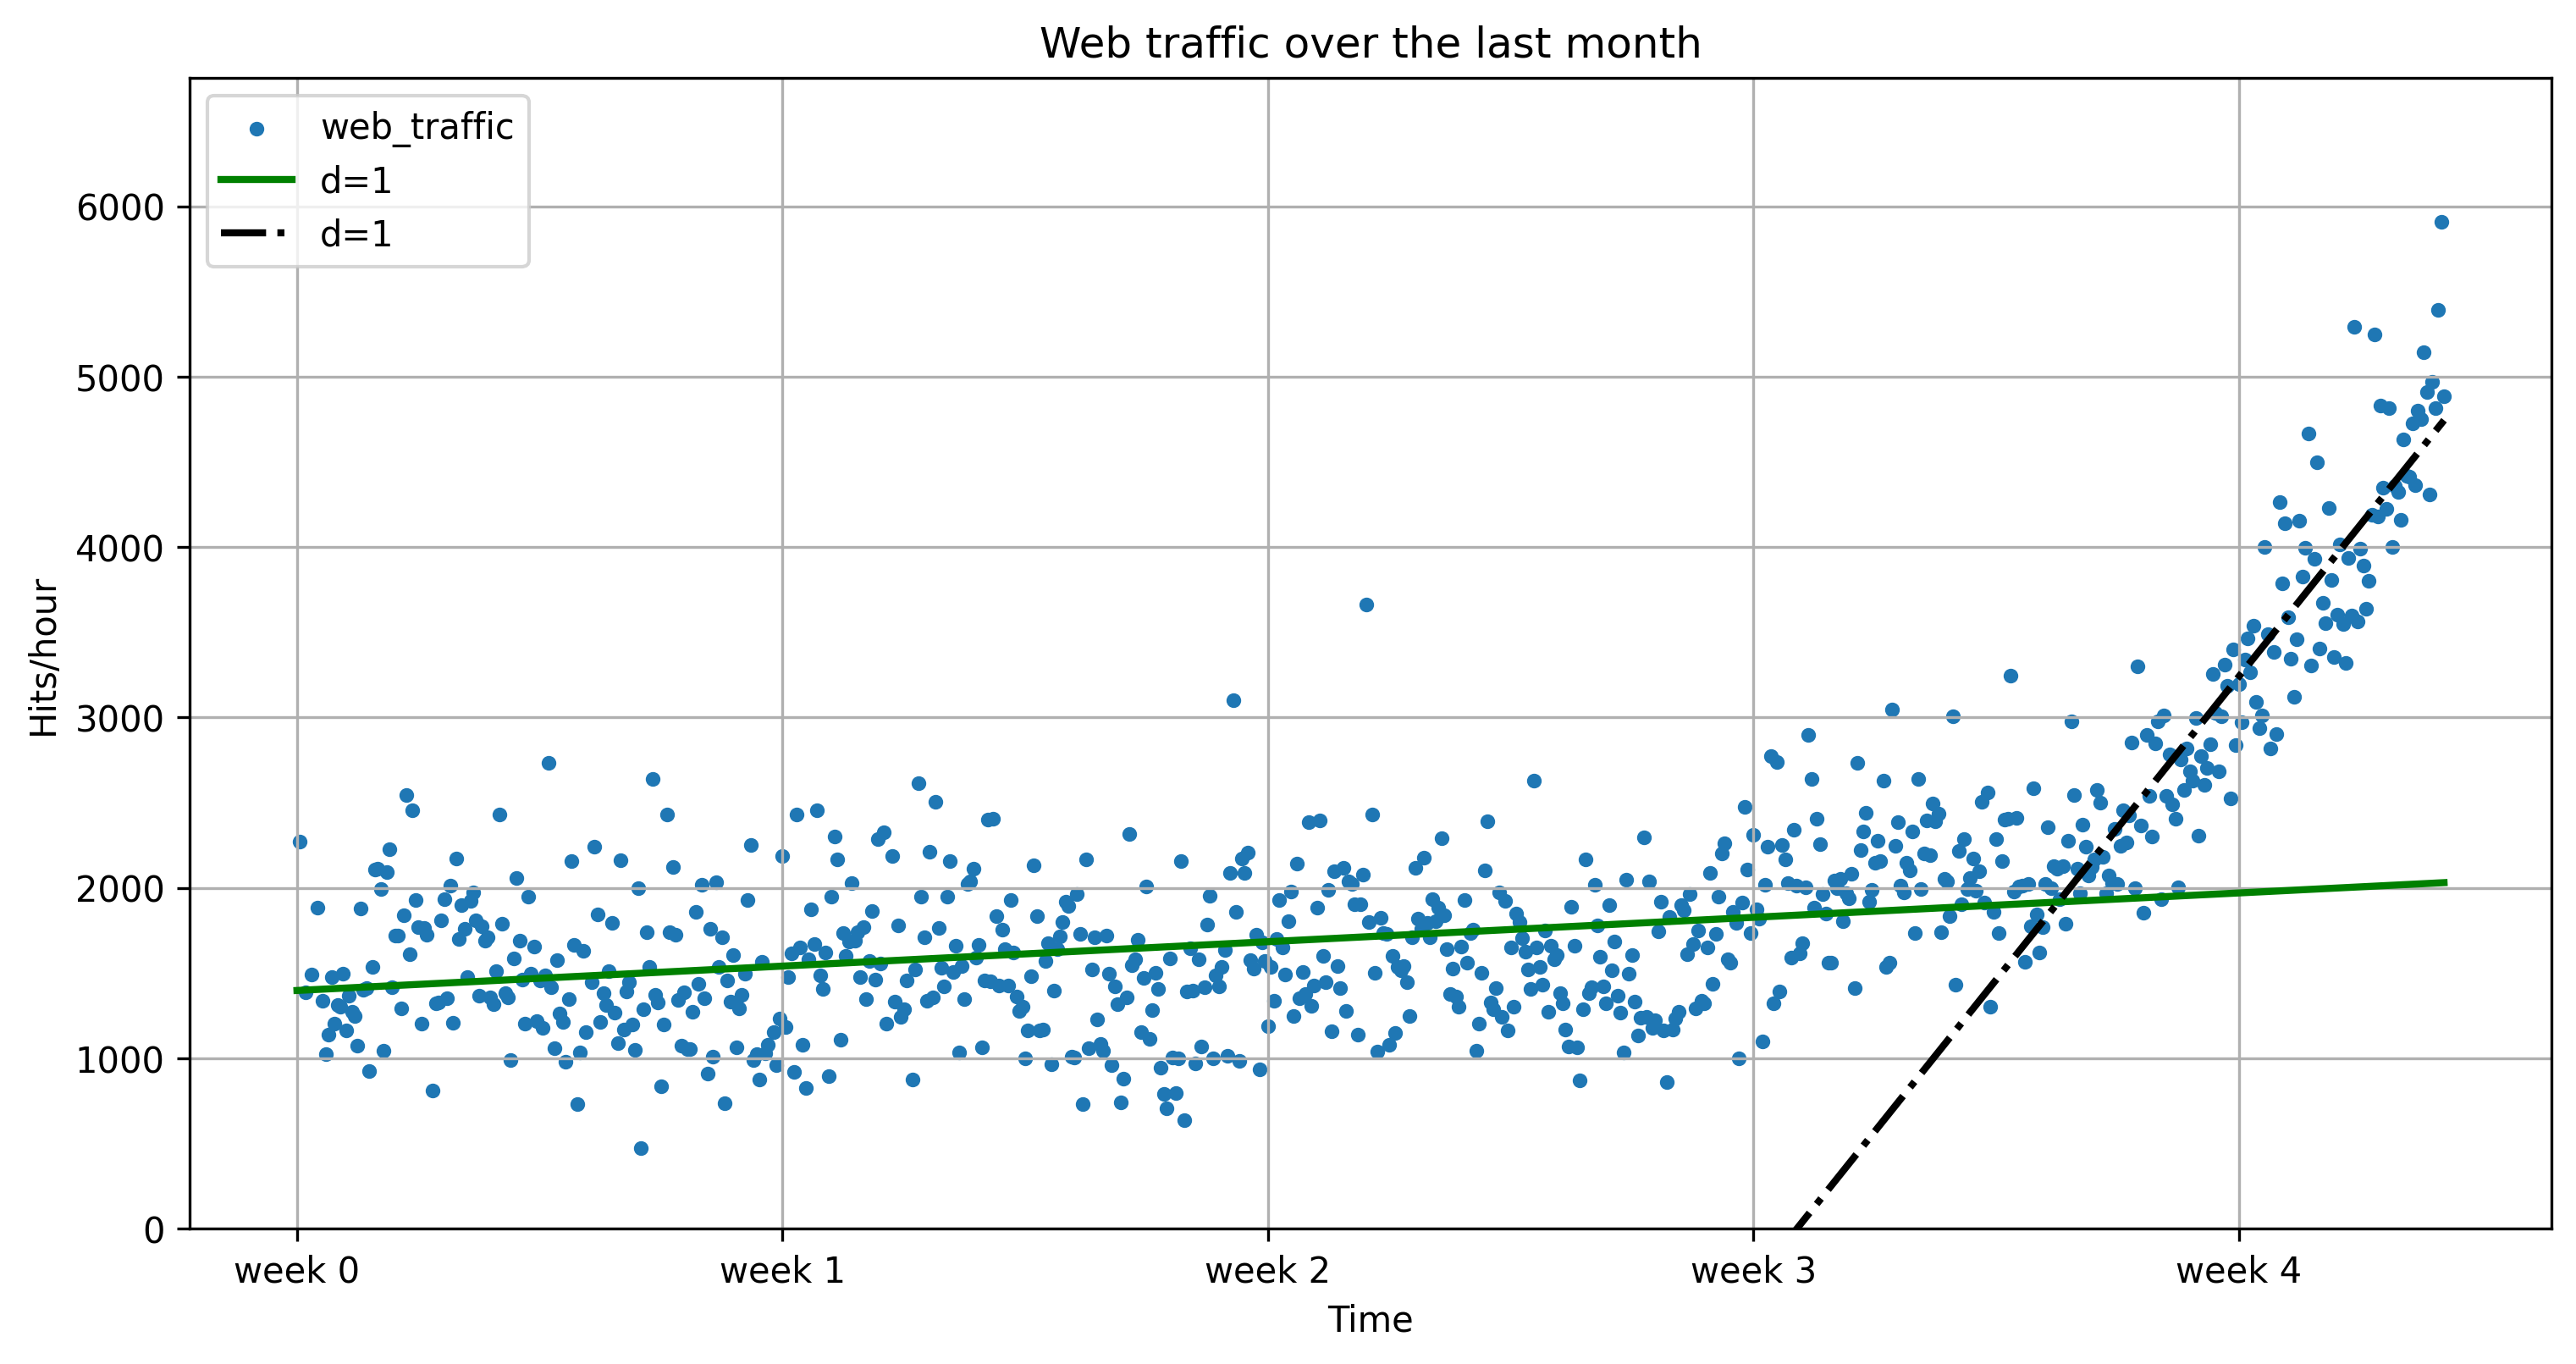

In [56]:
plot_web_traffic(hours, web_traffic, models=[f1a, f1b], fig_idx="0005")

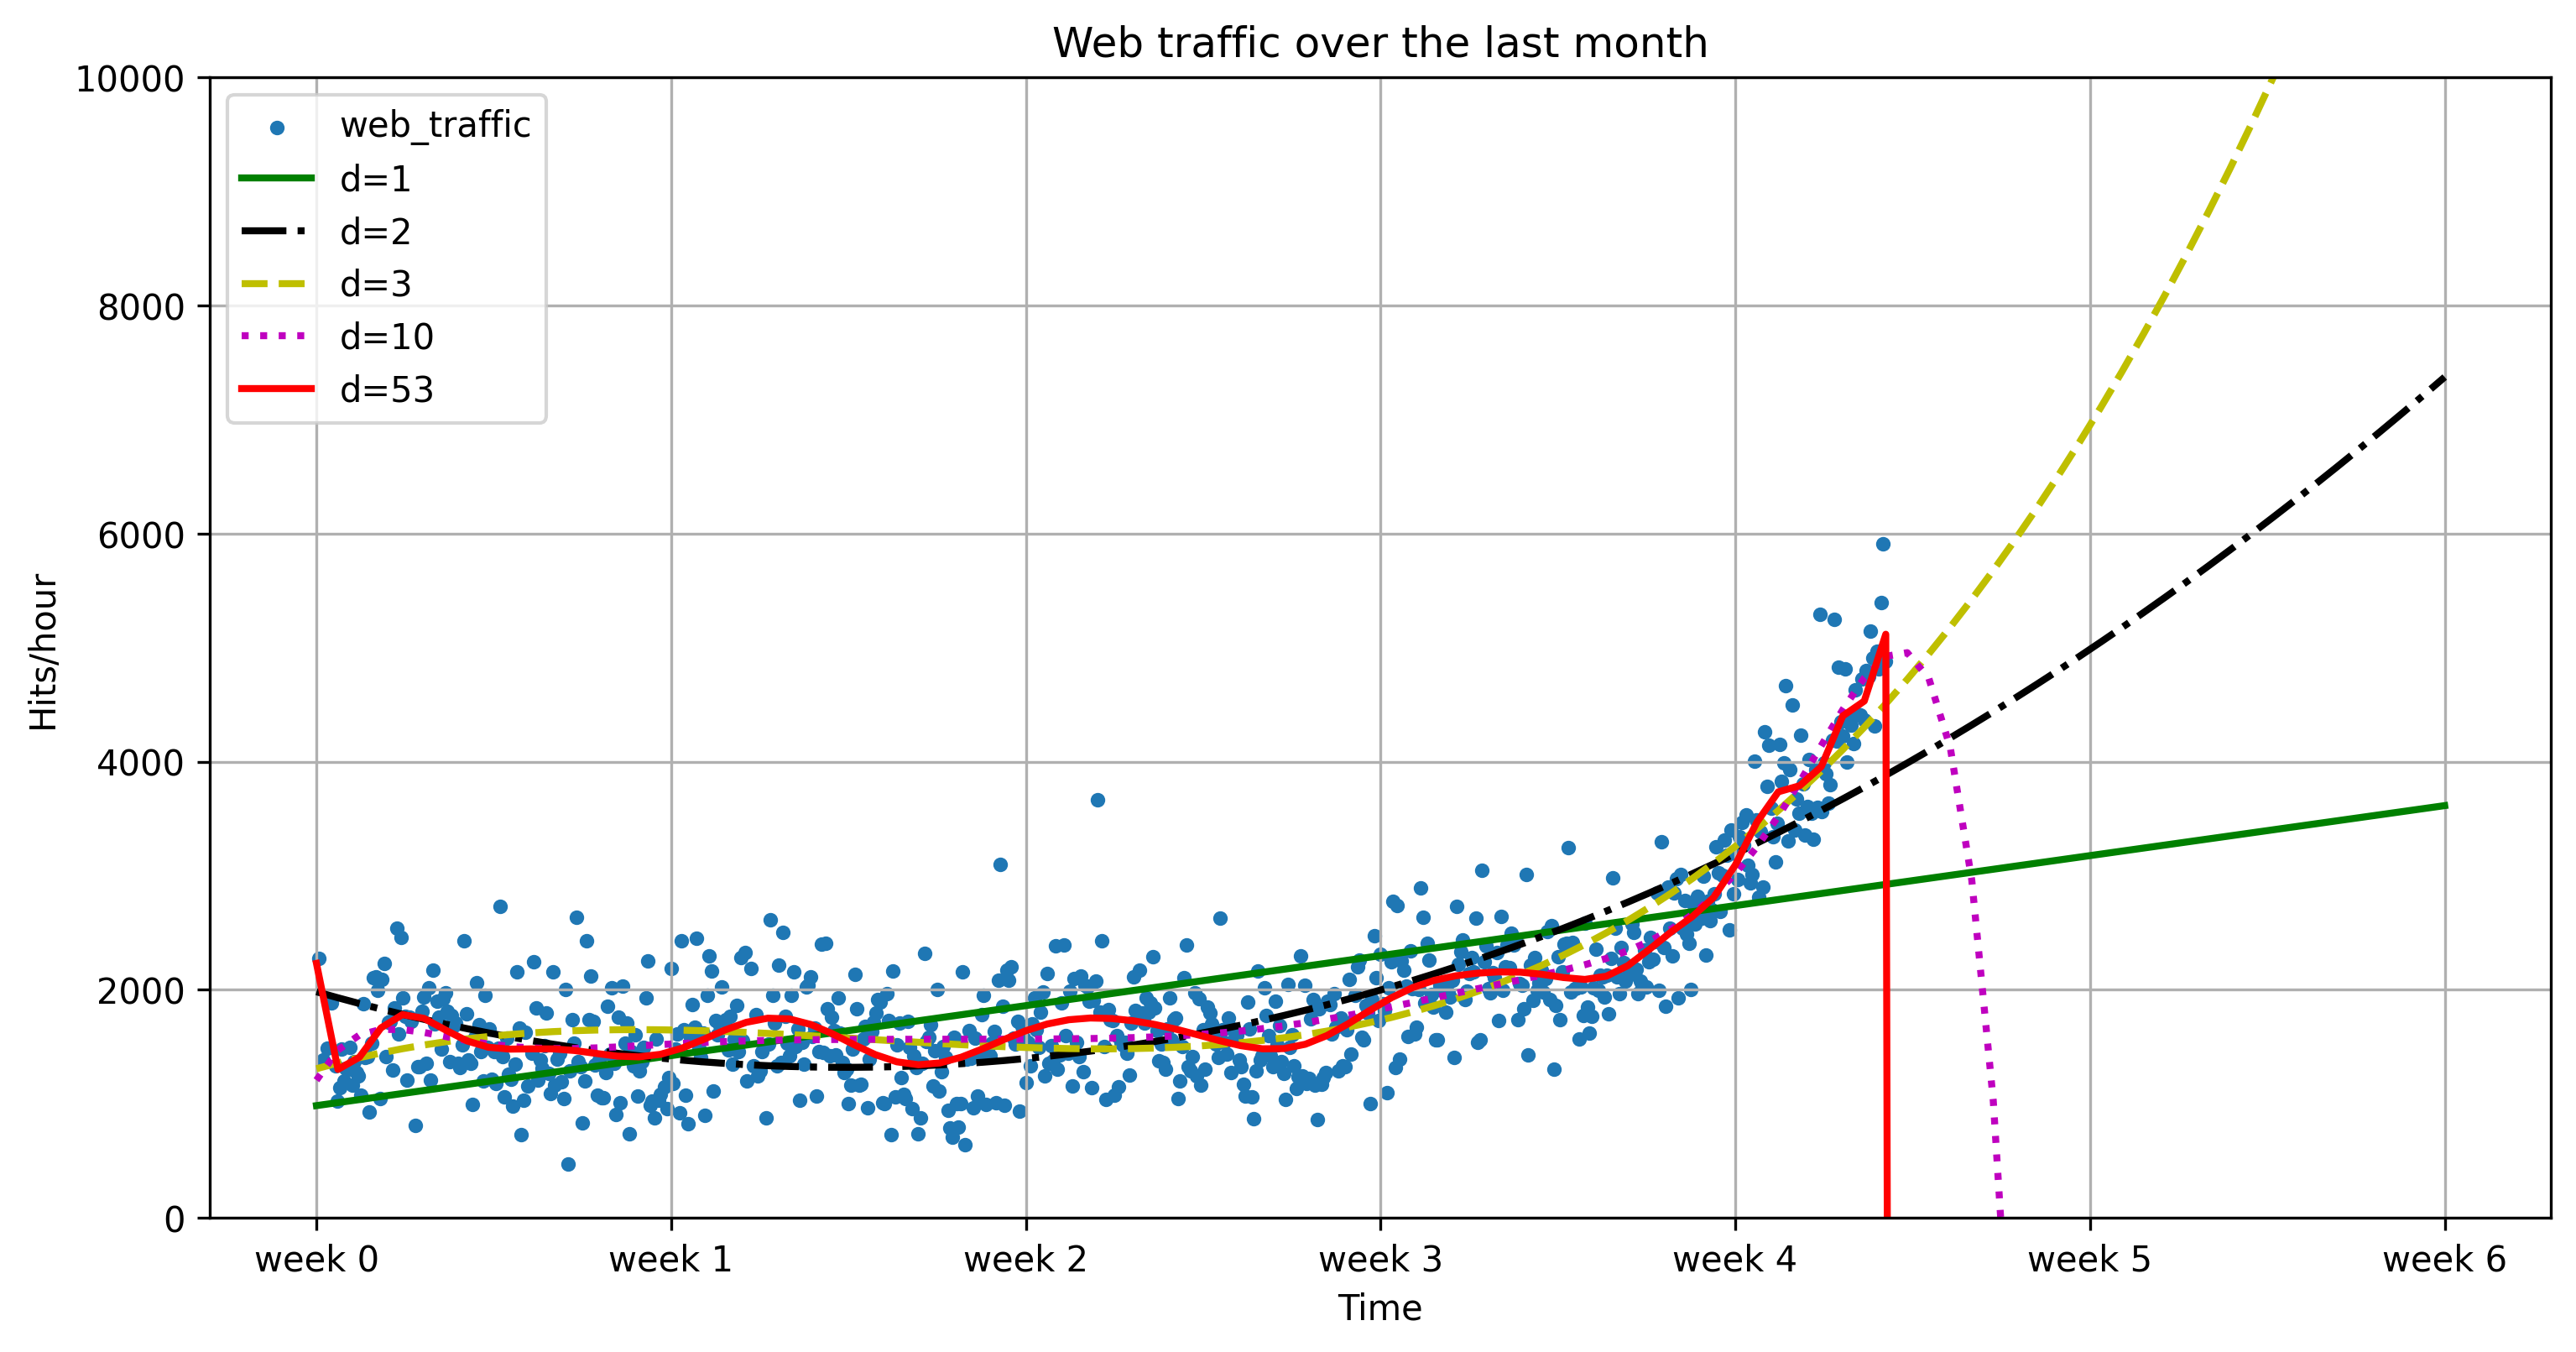

In [57]:
plot_web_traffic(hours, web_traffic, 
    models=[f1, f2, f3, f10, f100],
    mx=np.linspace(0, 6*7*24, 100),
    ymax=10000, 
    fig_idx="0006")

Let's look how they behave if we fit them only to the data of the last week.

In [58]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))

/usr/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
print("Errors for data set after inflection point for different orders")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print(f"d={f.order}; error={error(f, xb, yb)}")

Errors for data set after inflection point for different orders
d=1; error=22012264.773841873
d=2; error=19758403.578026175
d=3; error=19754222.55630534
d=10; error=18907338.906487055
d=53; error=18288636.03872864


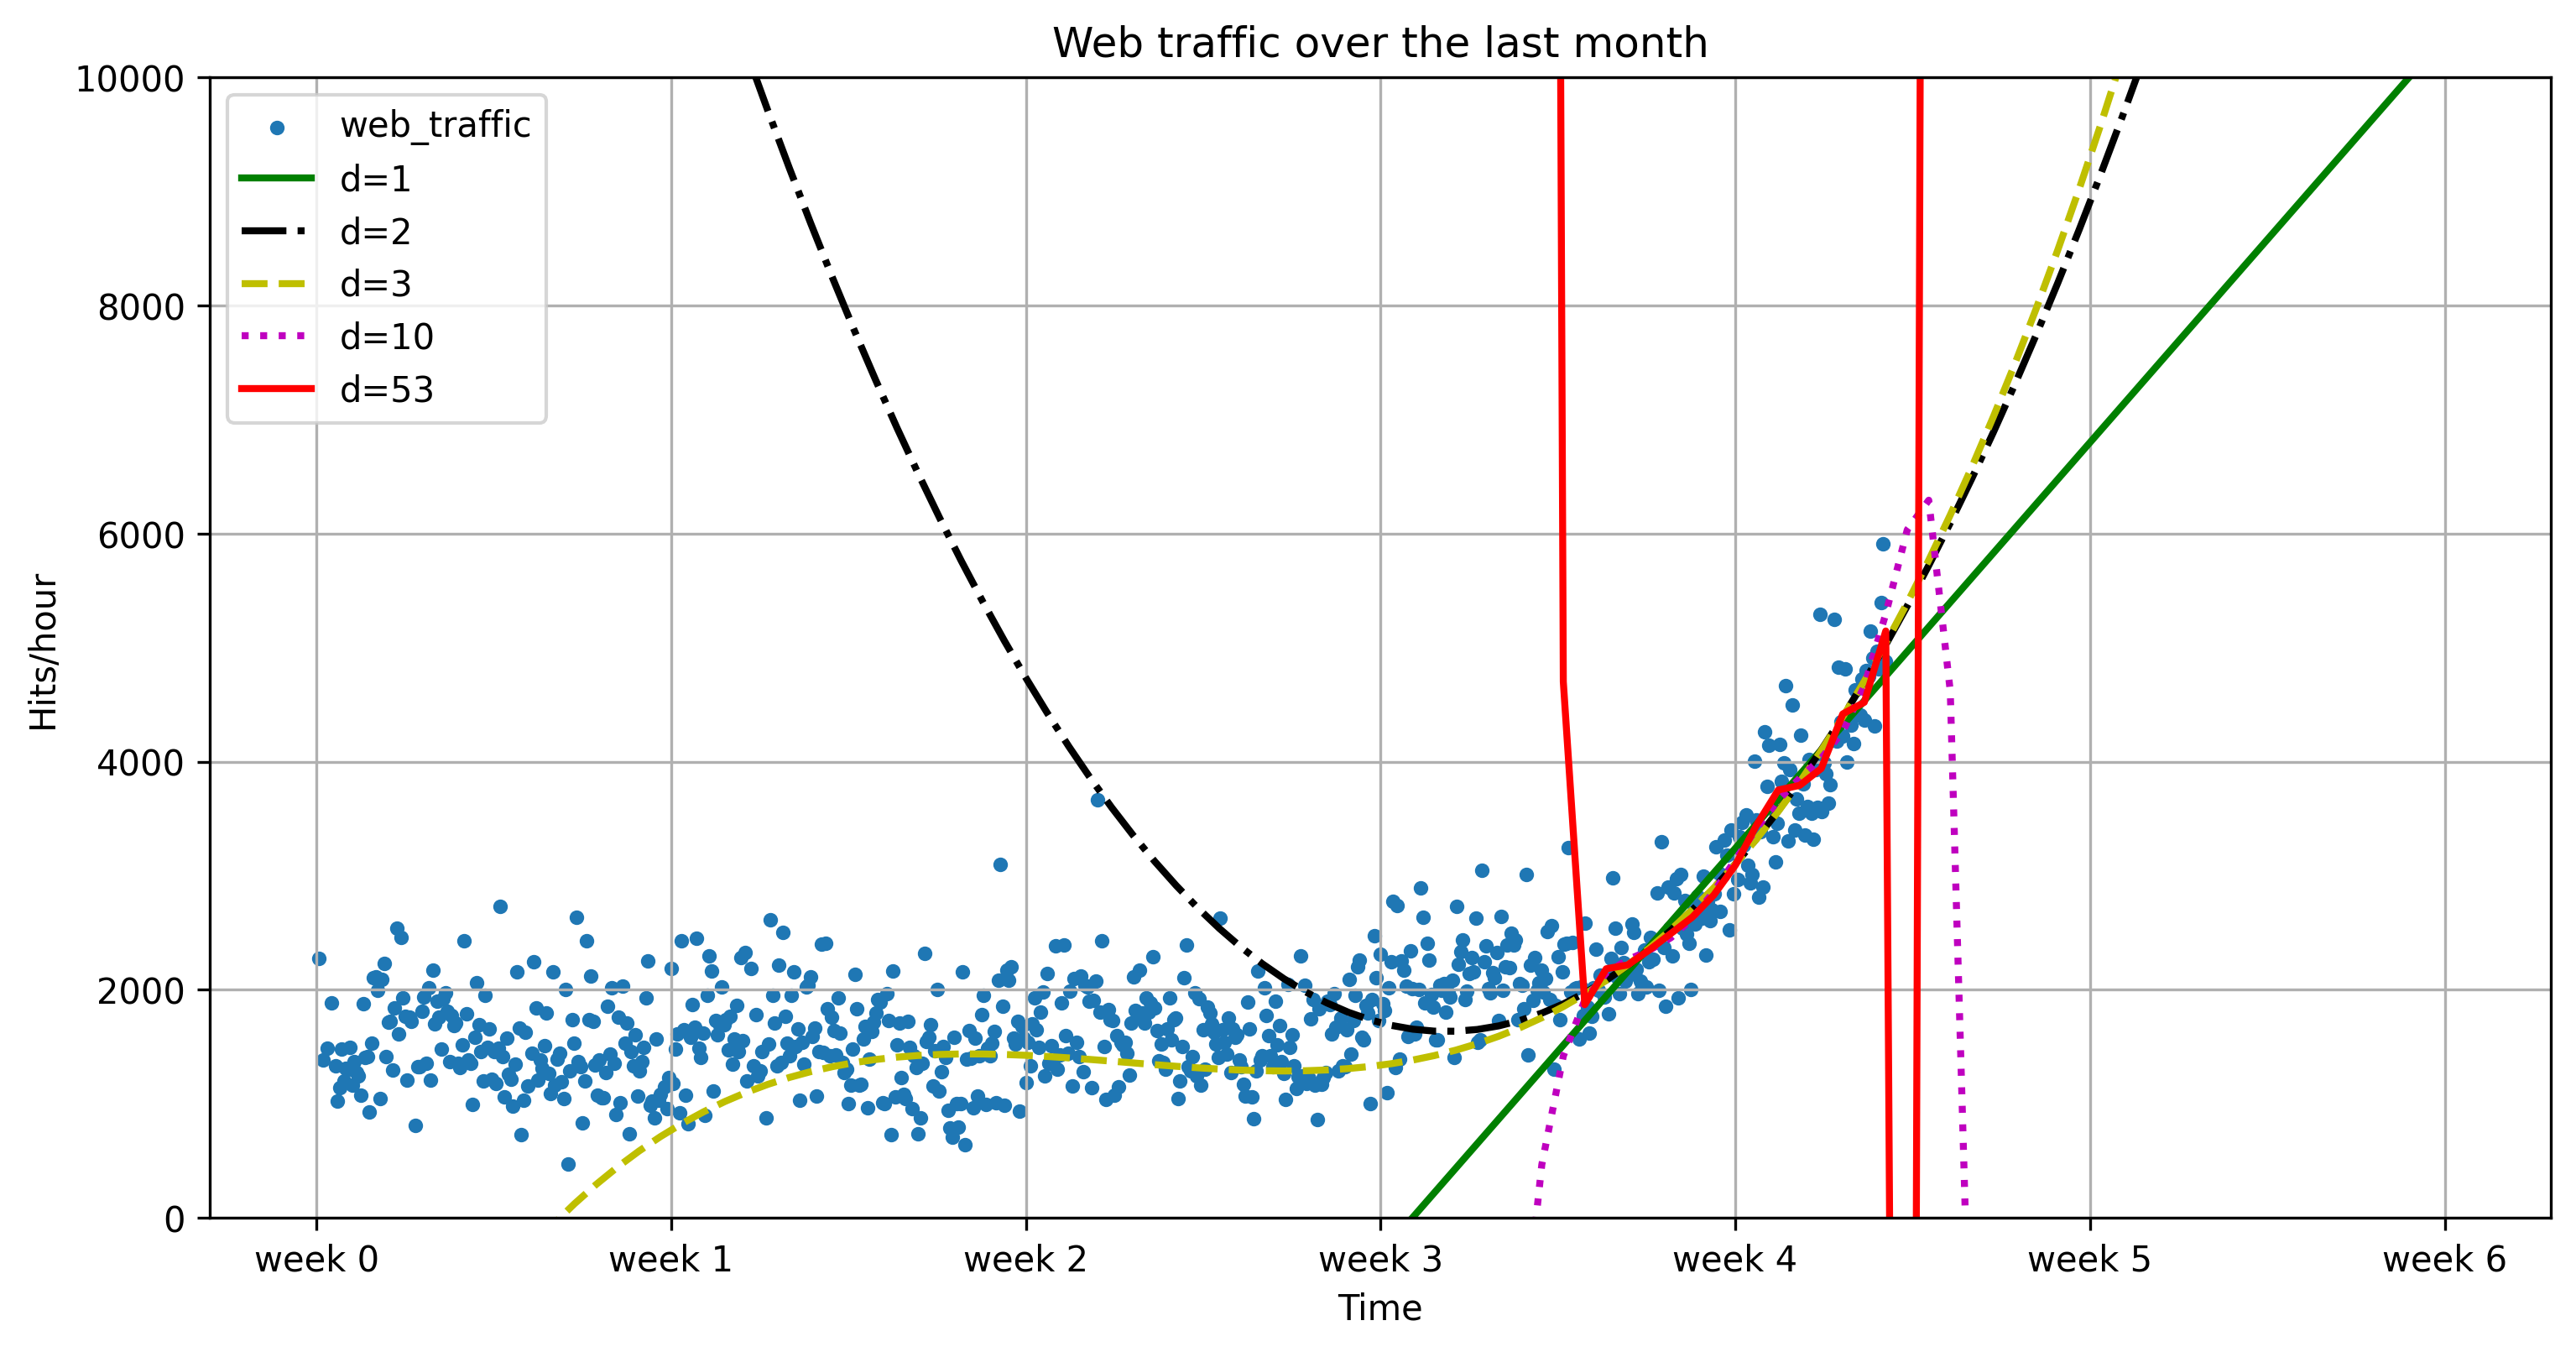

In [60]:
plot_web_traffic(hours, web_traffic, 
    models=[fb1, fb2, fb3, fb10, fb100],
    mx=np.linspace(0, 6*7*24, 100),
    ymax=10000, 
    fig_idx="0007")

### Splitting training and testing
Let's use 30% of the web traffic data after the inflection point as test data that we do not train on.

In [61]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))


fbt2(x)= 
         2
0.09426 x - 105.4 x + 3.135e+04
fbt2(x)-100,000= 
         2
0.09426 x - 105.4 x - 6.865e+04
Test errors for only the time after inflection point
Error d=1: 7129567.095776
Error d=2: 7088695.541054
Error d=3: 7089081.722442
Error d=10: 7405787.048615
Error d=53: 7873313.050241


/usr/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
	d=1: 22012264.773842
	d=2: 19758403.578026
	d=3: 19754222.556305
	d=10: 18907338.906487
	d=53: 18288636.038729


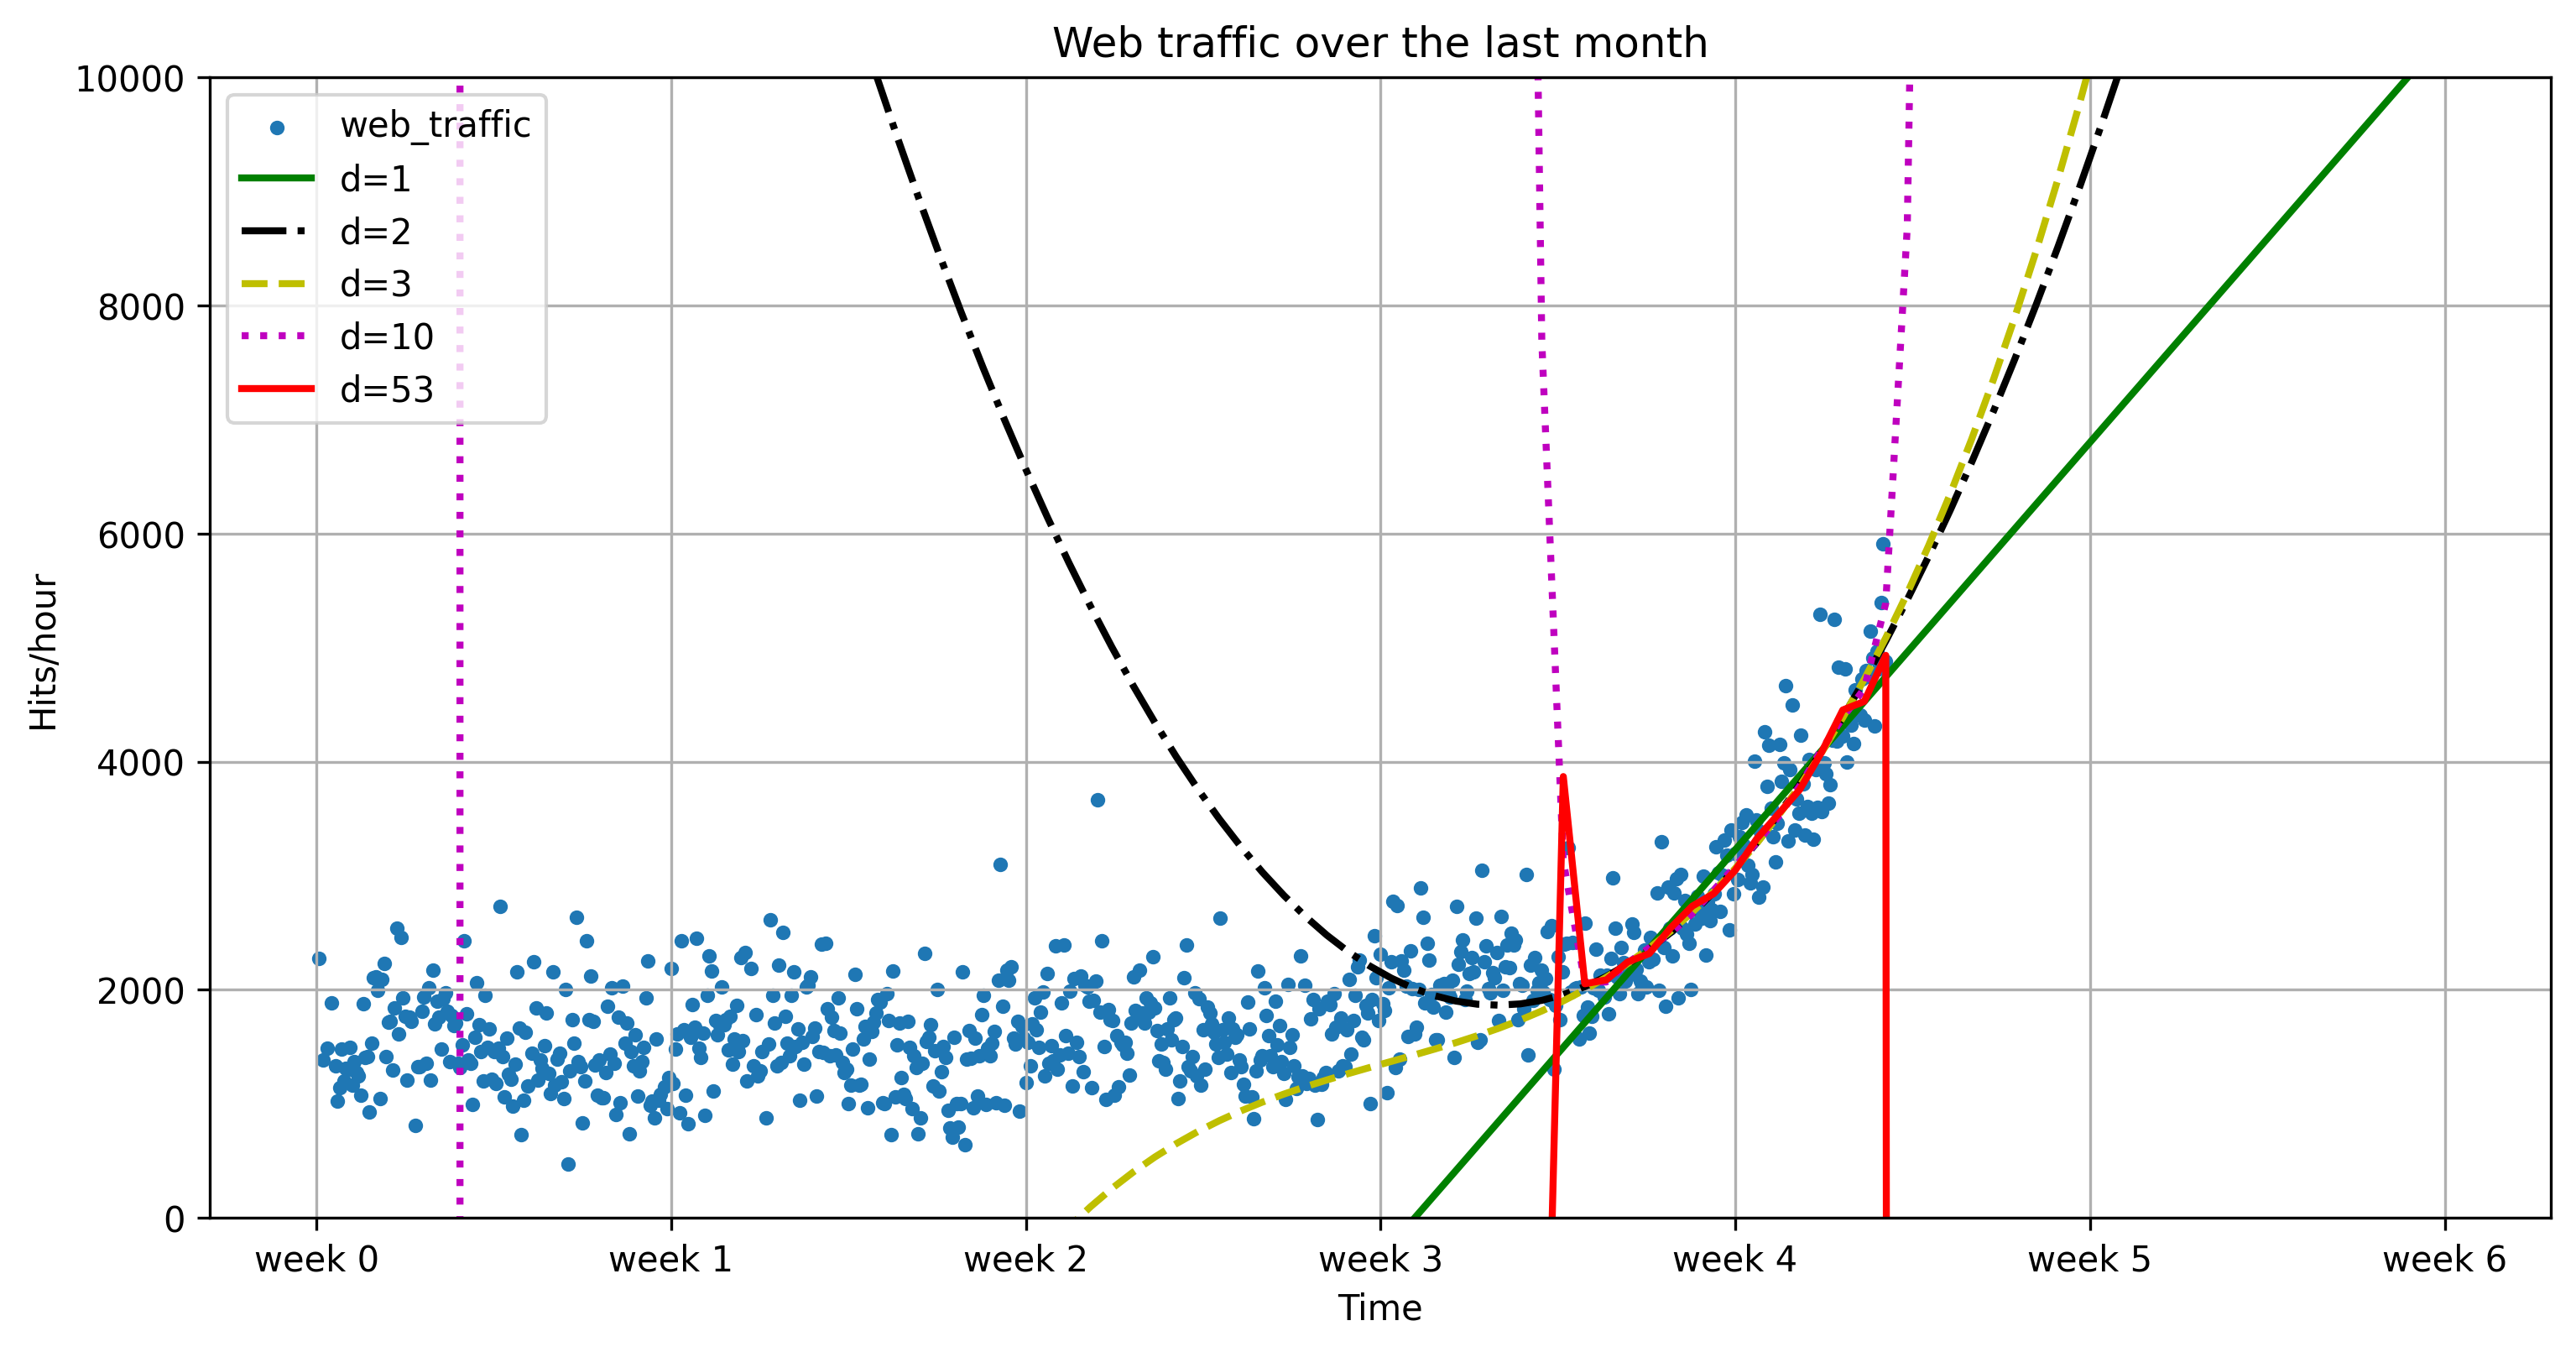

In [62]:
print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("\td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000,
    fig_idx="08")

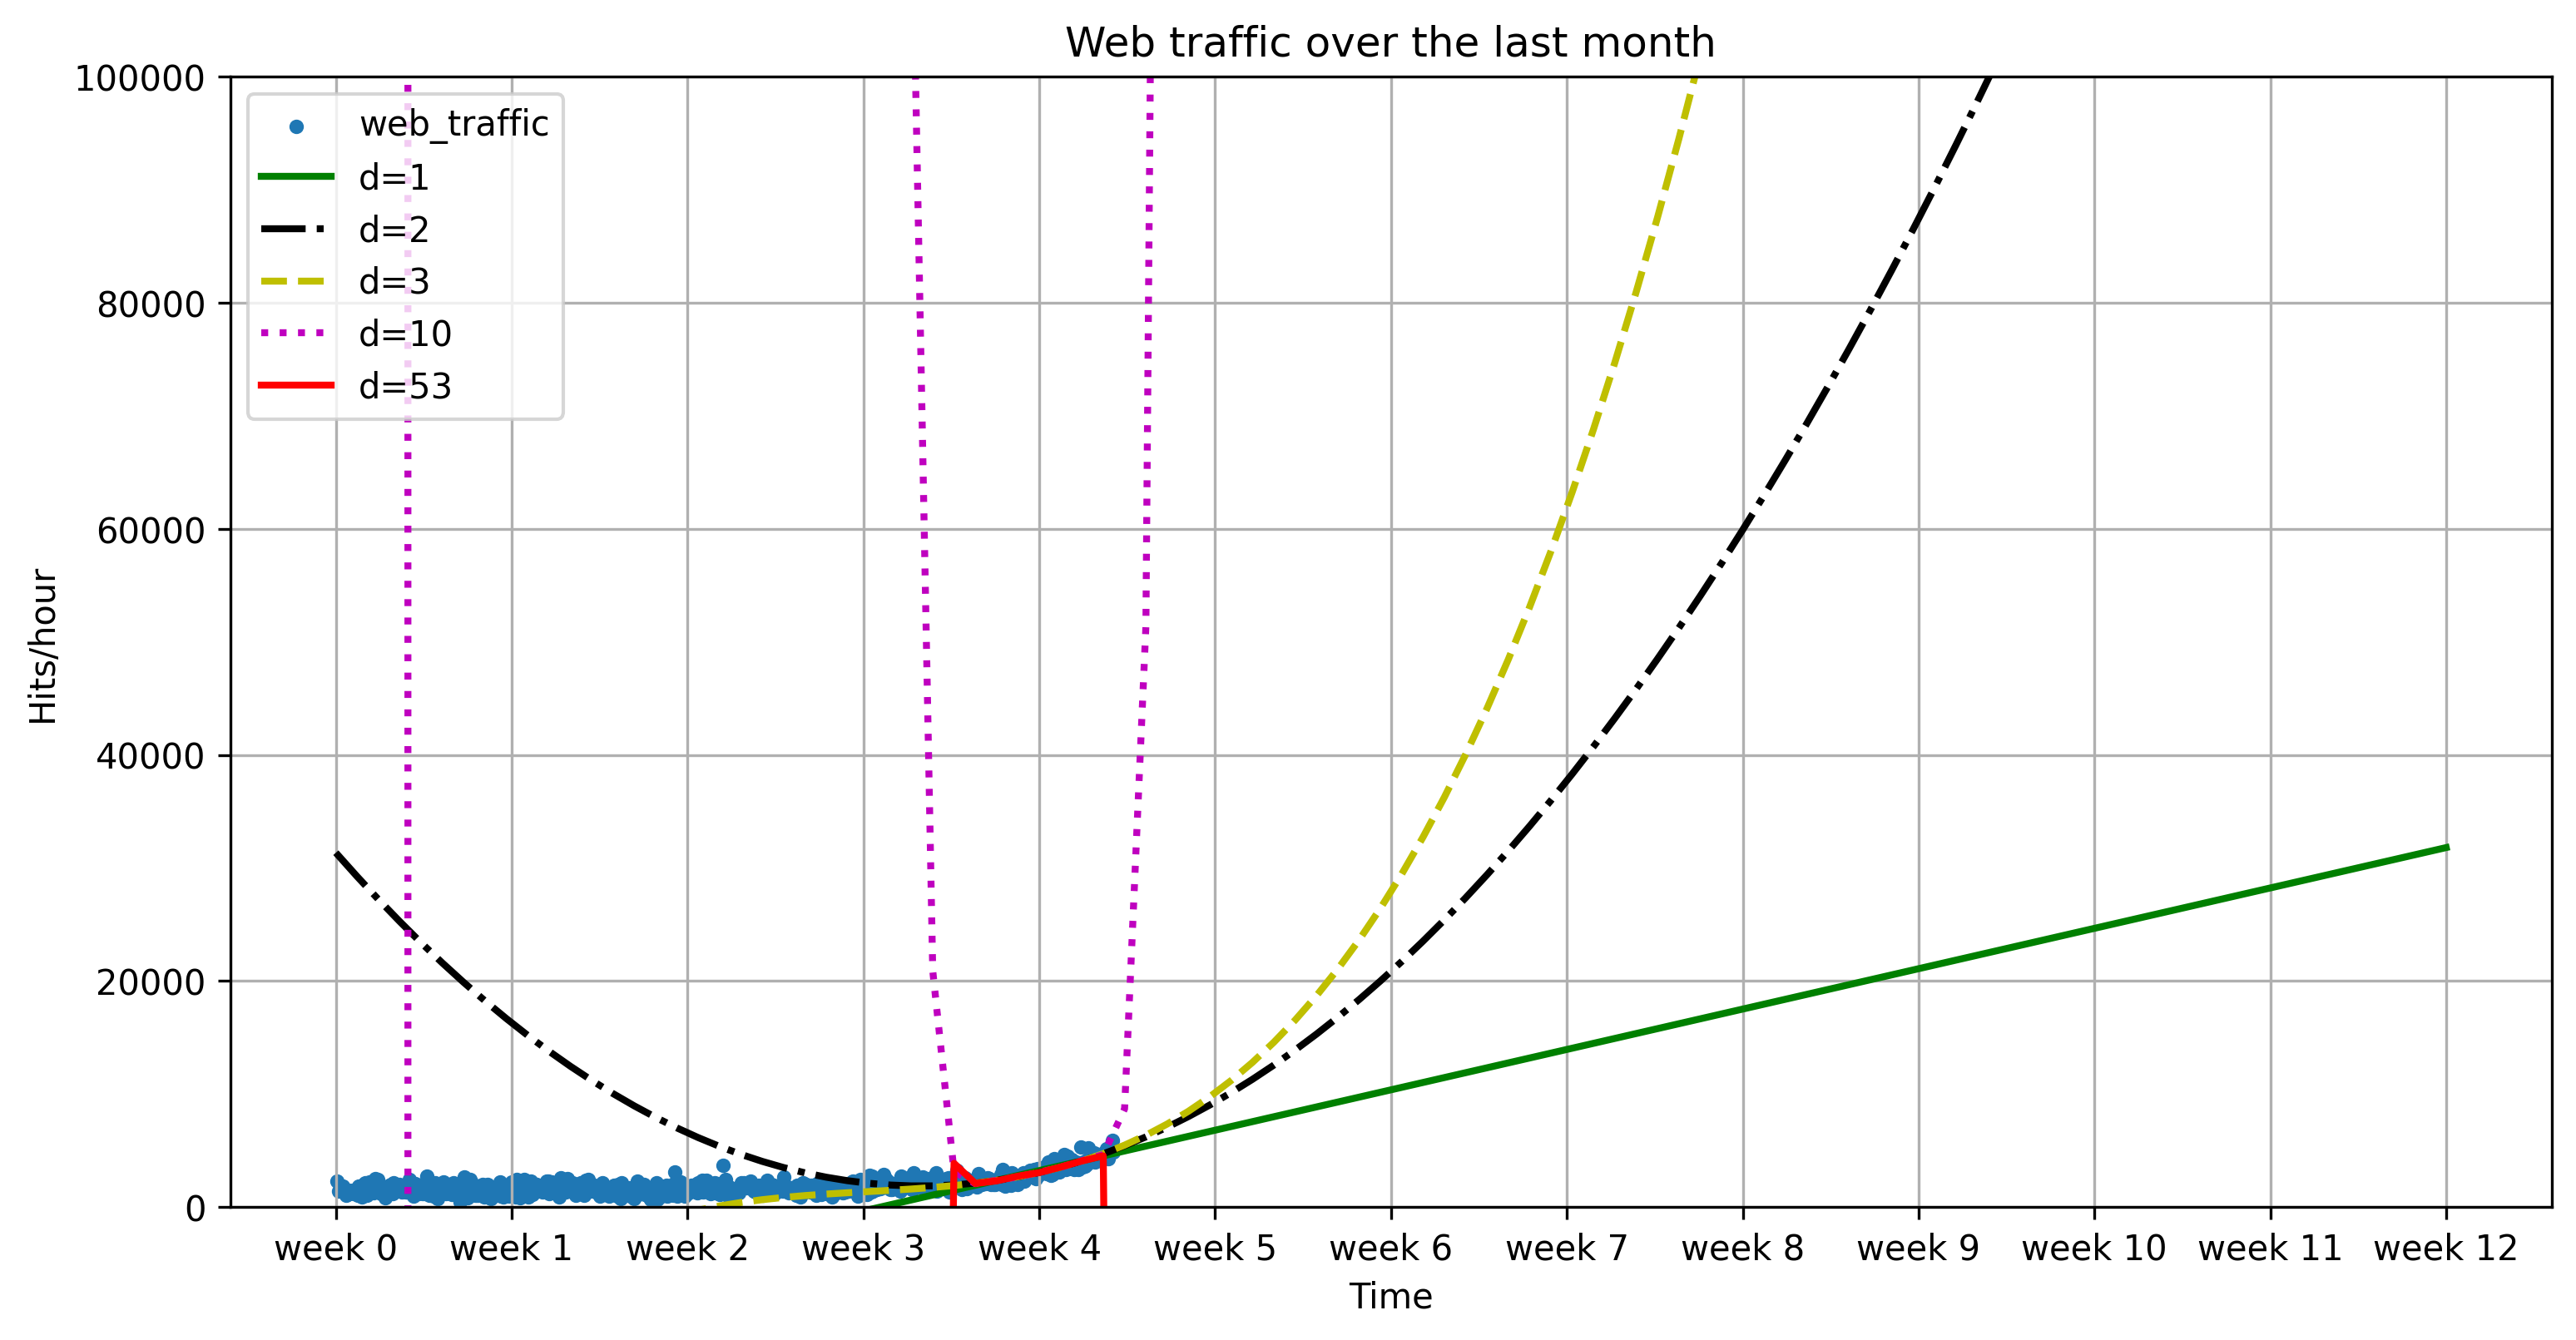

In [63]:
plot_web_traffic(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],    
    mx=np.linspace(0, 12 * 7 * 24, 100),
    ymax=100000,
    fig_idx="09")

### When will we hit 100000 hits per hour?

In [64]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

fbt2(x)= 
         2
0.09426 x - 105.4 x + 3.135e+04
fbt2(x)-100,000= 
         2
0.09426 x - 105.4 x - 6.865e+04
100,000 hits/hour expected at week 9.402219


---